# Analiziranje podatkov glede na ITM klasifikacijo

Naložimo ustrezne pakete

In [1960]:
# naložimo pakete
import os
import pandas as pd

nov_directory = 'obdelani podatki'
csv_drzave = 'drzave.csv'
csv_kontinenti = 'kontinenti.csv'
csv_dodatno = 'dodatno.csv'

# izberemo interaktivni 'notebook' stil risanja
%matplotlib inline

pd.set_option('display.max_rows', 15)
path1 = os.path.join(nov_directory, csv_drzave) 
path2 = os.path.join(nov_directory, csv_kontinenti) 
path3 = os.path.join(nov_directory, csv_dodatno)

#naložimo razpredelnico, s katero bomo delali
countries = pd.read_csv(path1)
continents = pd.read_csv(path2)
ITM = pd.read_csv(path3)

In [1961]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. Splošno

V spodnji tabeli je prikazana klasifikacija ITM vrednosti. V tej datoteki sem se osredotočila na analiziranje podatkov indeksa telesne mase (ITM) glede na klasifikacijo in povezavo med višino, težo in ITM vrednostjo. 

In [1962]:
ITM.index += 1
ITM

,kategorija,ITM,ITM prime
1,Severe Thinness,< 16,< 0.64
2,Moderate Thinness,16 - 17,0.64 - 0.68
3,Mild Thinness,17 - 18.5,0.68 - 0.74
4,Normal,18.5 - 25,0.74 - 1
5,Overweight,25 - 30,1 - 1.2
6,Obese Class I,30 - 35,1.2- 1.4
7,Obese Class II,35 - 40,1.4 - 1.6
8,Obese Class III,> 40,> 1.6


In [1963]:
ITM.describe()

,kategorija,ITM,ITM prime
count,8,8,8
unique,8,8,8
top,Severe Thinness,< 16,< 0.64
freq,1,1,1


V naslednji funkciji lahko vidimo, da stolpec 'kategorija' porabi največ prostora. Kljub temu je očitna razlika med porabo prostora za države, dele kontinentov in ITM tabelo. Najmanjša poraba (če ne upoštevamo porabe indeksa) pri kontinentih nas 'stane' 176 bajtov, pri ITM tabeli 510 bajtov, pri državah pa kar 1016 bajtov. Pri vseh treh porabah so ob tem velike razlike med numeričnimi in besedilnimi podatki - pri numeričnih je poraba manjša.

In [1964]:
ITM.memory_usage(deep=True)

Index         132
kategorija    559
ITM           510
ITM prime     521
dtype: int64

## 2. Razporeditve po kategorijah glede na ITM klasifikacijo

### 2.1. Države

#### 2.1.1. Moški

V spodnji funkciji lahko vidimo razporeditev držav glede na ITM klasifikacijo po moških ITM vrednostih. V kategoriji normalne telesne teže je 38 držav, v kategoriji povišane telesne teže kar 81 držav, v kategoriji debelosti 1. razreda pa 1 država.

In [1965]:
def classify_and_print_countries(countries, categories):
    classified_countries = {category: {'countries': [], 'count': 0} for category in categories['kategorija']}
    category_counts = {}  
    
    for _, row in countries.iterrows(): # _ je za indeks, ki nas trenutno ne zanima; iterrows gre skozi vrstice
        country = row['ime države']
        itm = float(row['ITM moških'])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_countries[bounds['kategorija']]['countries'].append(country)
                classified_countries[bounds['kategorija']]['count'] += 1
                break
    
    for category, data in classified_countries.items():
        count = data['count']
        countries_list = data['countries']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobene države.")
        else:
            country_list_str = ', '.join(countries_list)
            total_countries = len(countries_list)
            print(f"V kategoriji '{category}' so naslednje države: {country_list_str}. Število vseh držav je {total_countries}.")
        category_counts[category] = count
    
    return category_counts

def parse_to_bounds(range_str):
    if '<' in range_str:
        lower = float('-inf') #ni spodnje meje
        upper = float(range_str[1:]) # da umaknemo '<'
    elif '-' in range_str:
        lower, upper = map(float, range_str.split('-')) #da dobimo zgornjo in spodnjo mejo
    else: 
            lower = float(range_str) 
            upper = float('inf')
    return lower, upper
    

category_counts_m = classify_and_print_countries(countries, ITM)

V kategoriji 'Severe Thinness' ni nobene države.
V kategoriji 'Moderate Thinness' ni nobene države.
V kategoriji 'Mild Thinness' ni nobene države.
V kategoriji 'Normal' so naslednje države: South Korea, China, Hong Kong, North Korea, Algeria, Singapore, Mauritius, Japan, Thailand, Cameroon, Sudan, Chad, Somalia, Eritrea, Zimbabwe, Kenya, Nigeria, Ghana, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Maldives, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 38.
V kategoriji 'Overweight' so naslednje države: Netherlands, Montenegro, Estonia, Denmark, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Switzerland, Australia, Ireland, Canada, Austria, France, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Polynesia

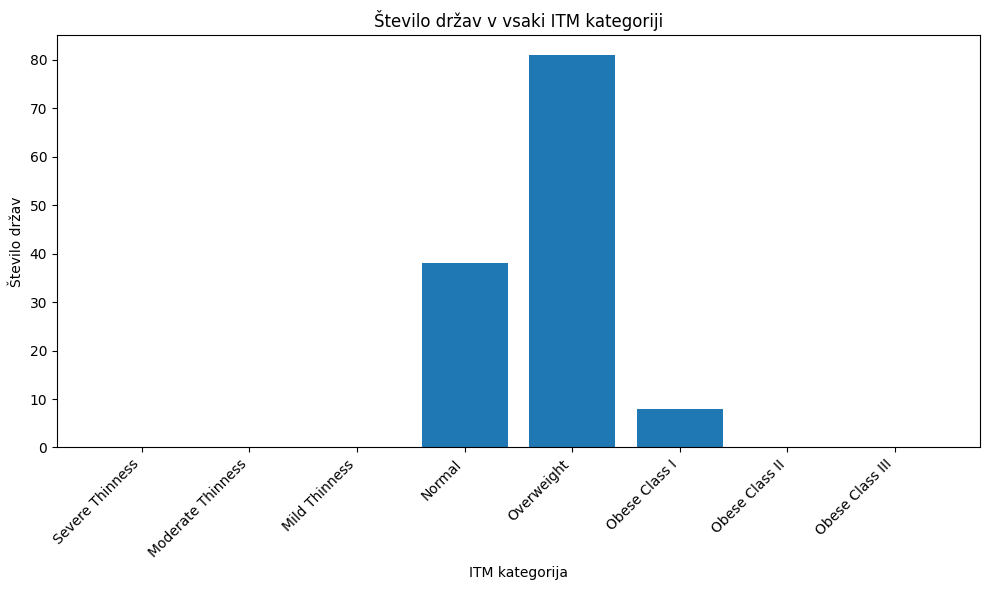

In [1966]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_m.keys(), category_counts_m.values())
plt.xlabel('ITM kategorija')
plt.ylabel('Število držav')
plt.title('Število držav v vsaki ITM kategoriji')
plt.xticks(rotation=45, ha='right')

#da se izriše graf
plt.tight_layout()
plt.show()

#### 2.1.2. Ženske

V spodnji funkciji lahko vidimo razporeditev držav glede na ITM klasifikacijo po ženskih ITM vrednostih. V kategoriji normalne telesne teže je 37 držav, v kategoriji povišane telesne teže 77 držav, v kategoriji debelosti 1. razreda kar 12 držav in v kategoriji debelosti 2. razreda 1 država. Ženske ITM vrednosti so očitno višje od moških (kasneje prikazano tudi v tabeli).

In [1967]:
def classify_and_print_countries_female(countries, categories):
    classified_countries = {category: {'countries': [], 'count': 0} for category in categories['kategorija']}
    category_counts = {} 

    for _, row in countries.iterrows():  # _ je za indeks, ki nas trenutno ne zanima; iterrows gre skozi vrstice
        country = row['ime države']
        itm = float(row['ITM žensk'])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_countries[bounds['kategorija']]['countries'].append(country)
                classified_countries[bounds['kategorija']]['count'] += 1
                break
    

    for category, data in classified_countries.items():
        count = data['count']
        countries_list = data['countries']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobene države.")
        else:
            country_list_str = ', '.join(countries_list)
            total_countries = len(countries_list)
            print(f"V kategoriji '{category}' so naslednje države: {country_list_str}. Število vseh držav je {total_countries}.")
        category_counts[category] = count
    
    return category_counts


def parse_to_bounds(range_str):
    if '<' in range_str:
        lower = float('-inf') #ni spodnje meje
        upper = float(range_str[1:]) # da umaknemo '<'
    elif '-' in range_str:
        lower, upper = map(float, range_str.split('-')) #da dobimo zgornjo in spodnjo mejo
    else: 
            lower = float(range_str) 
            upper = float('inf')
    return lower, upper
    
category_counts_f = classify_and_print_countries_female(countries, ITM)

V kategoriji 'Severe Thinness' ni nobene države.
V kategoriji 'Moderate Thinness' ni nobene države.
V kategoriji 'Mild Thinness' ni nobene države.
V kategoriji 'Normal' so naslednje države: Denmark, Switzerland, Austria, France, South Korea, China, Hong Kong, Italy, North Korea, Taiwan, Singapore, Haiti, Japan, Chad, Somalia, Eritrea, Kenya, Nigeria, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 37.
V kategoriji 'Overweight' so naslednje države: Netherlands, Montenegro, Estonia, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Australia, Ireland, Canada, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Polynesia, Luxembourg, United Kingdom, Grenada, New Zealand, 

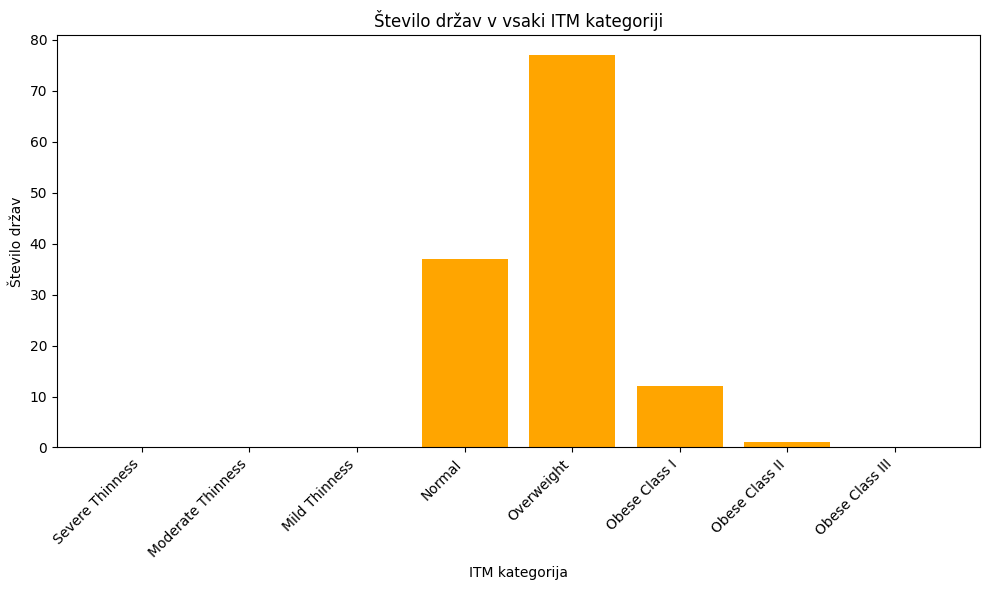

In [1968]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_f.keys(), category_counts_f.values(), color='orange')
plt.xlabel('ITM kategorija')
plt.ylabel('Število držav')
plt.title('Število držav v vsaki ITM kategoriji')
plt.xticks(rotation=45, ha='right')

# da se nariše graf
plt.tight_layout()
plt.show()

#### 2.1.3. Razvrstitve po kategorijah

In [1969]:
def create_sorted_tables_by_category(countries, itm, categories):
    classified_countries = {category: {'countries': []} for category in categories}
    
    for _, country_row in countries.iterrows():
        country = country_row['ime države']
        itm_value = float(country_row['ITM moških'])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries[bounds['kategorija']]['countries'].append((country, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_countries.items():
        countries_list = data['countries']
        
        if countries_list:
            sorted_countries = sorted(countries_list, key=lambda x: x[1], reverse=True)
            sorted_df = pd.DataFrame(sorted_countries, columns=['ime države', 'ITM moških'], index=range(1, len(sorted_countries) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables


sorted_tables_by_category = create_sorted_tables_by_category(countries, ITM, ITM['kategorija'])
for category, sorted_df in sorted_tables_by_category.items():
    print(f'Category: {category}')
    print(sorted_df)
    print('\n')

Category: Normal
               ime države  ITM moških
1                 Algeria        24.7
2               Mauritius        24.6
3                Maldives        24.6
4               Hong Kong        24.5
5             South Korea        24.4
..                    ...         ...
34  Congo (Dem. Republic)        21.4
35             Bangladesh        21.3
36             East Timor        21.2
37                Eritrea        20.3
38               Ethiopia        20.1

[38 rows x 2 columns]


Category: Overweight
          ime države  ITM moških
1   French Polynesia        29.6
2              Palau        29.6
3        Saint Lucia        29.5
4           Kiribati        29.1
5      United States        29.0
..               ...         ...
77          Malaysia        25.2
78           Grenada        25.1
79      South Africa        25.1
80          Dominica        25.0
81            Taiwan        25.0

[81 rows x 2 columns]


Category: Obese Class I
       ime države  ITM moških
1  Ame

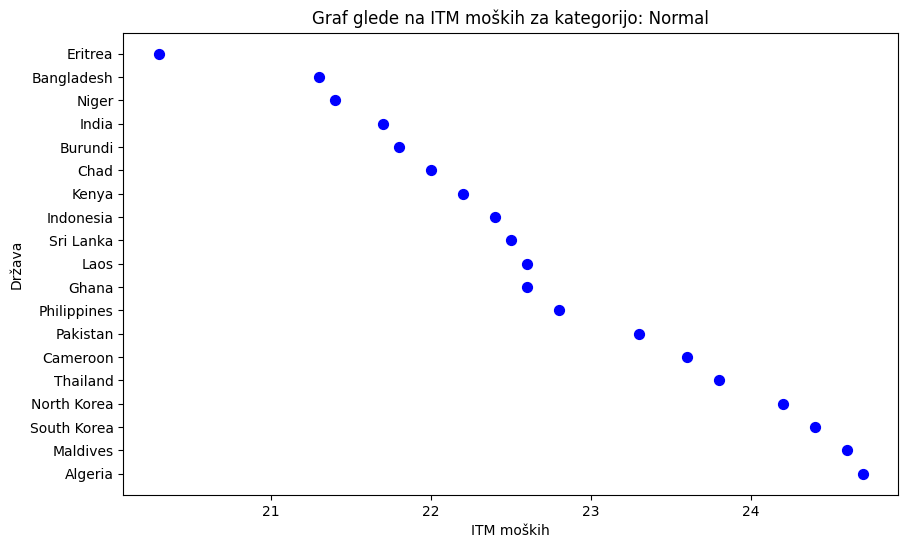

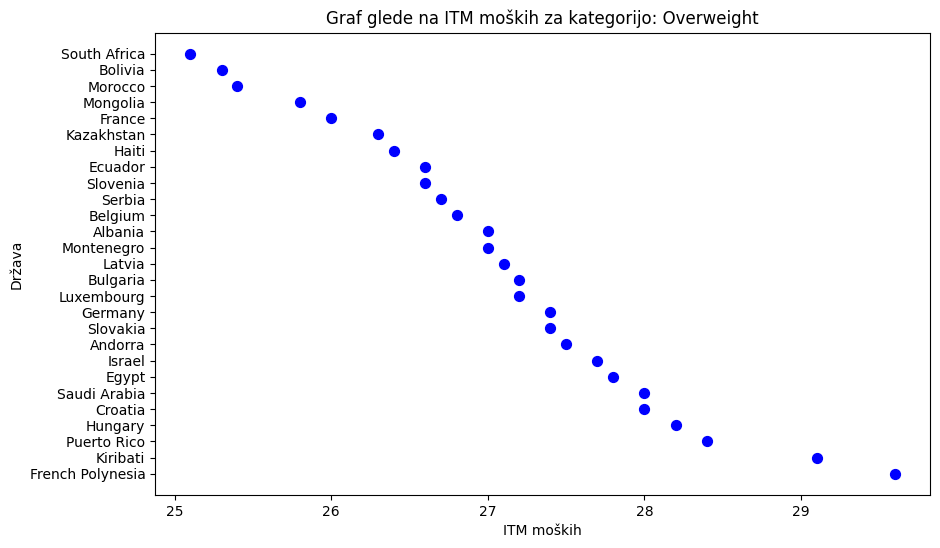

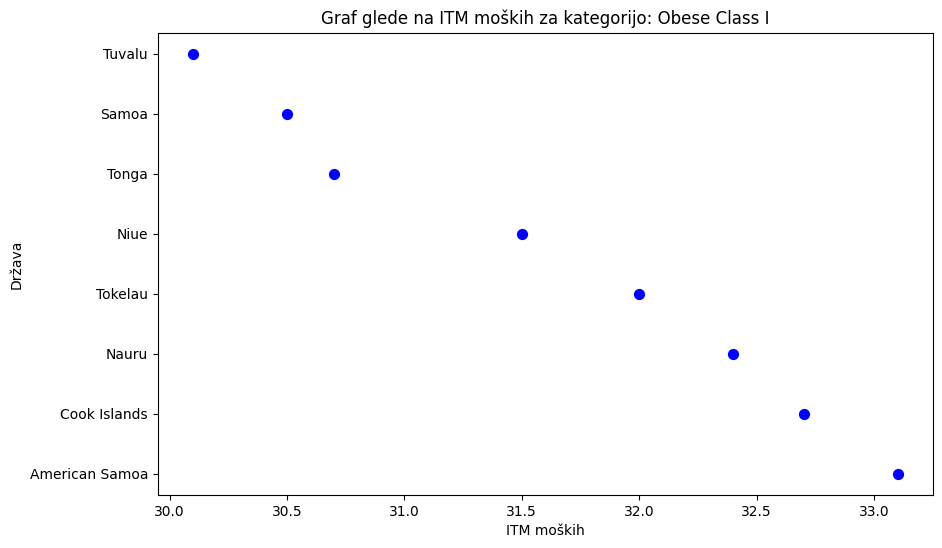

In [1970]:
def generate_male_scatter_plots(sorted_tables):
    for category, sorted_df in sorted_tables.items():
        countries = sorted_df['ime države']
        itm_values = sorted_df['ITM moških']

        plt.figure(figsize=(10, 6))
        
        # da ne bomo imeli preveč natlačenih podatkov
        if len(countries) > 50:
            step = 3 # vzamemo vsak tretji podatek, če je držav več kot 50
        elif len(countries) > 30:
            step = 2 # vzamemo vsak drugi podatek, če je držav več kot 30
        else:
            step = 1 # če jih je manj kot 30, vzamemo vse
        
        plt.scatter(itm_values[::step], countries[::step], color='blue', marker='o', s=50)
        plt.xlabel('ITM moških')
        plt.ylabel('Država')
        plt.title(f'Graf glede na ITM moških za kategorijo: {category}')
        plt.show()

generate_male_scatter_plots(sorted_tables_by_category)

In [1971]:
def create_sorted_tables_by_category_female(countries, itm, categories):
    classified_countries = {category: {'countries': []} for category in categories}
    
    for _, row in countries.iterrows():
        country = row['ime države']
        itm_value = float(row['ITM žensk'])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries[bounds['kategorija']]['countries'].append((country, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_countries.items():
        countries_list = data['countries']
        
        if countries_list:
            sorted_countries = sorted(countries_list, key=lambda x: x[1], reverse=True)
            sorted_df = pd.DataFrame(sorted_countries, columns=['ime države', 'ITM žensk'], index=range(1, len(sorted_countries) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables


sorted_tables_by_category_female = create_sorted_tables_by_category_female(countries, ITM, ITM['kategorija'])
for category, sorted_df in sorted_tables_by_category_female.items():
    print(f'Category: {category}')
    print(sorted_df)
    print('\n')

Category: Normal
    ime države  ITM žensk
1        Italy       24.9
2      Austria       24.7
3     Pakistan       24.7
4      Denmark       24.6
5       France       24.4
..         ...        ...
33     Burundi       21.5
34  East Timor       21.2
35     Eritrea       21.1
36  Madagascar       21.1
37    Ethiopia       21.0

[37 rows x 2 columns]


Category: Overweight
                ime države  ITM žensk
1                     Iraq       29.7
2                    Palau       29.7
3         French Polynesia       29.5
4     United Arab Emirates       29.5
5             South Africa       29.5
..                     ...        ...
73  Bosnia and Herzegovina       25.3
74                   Ghana       25.2
75                   Spain       25.1
76                Cameroon       25.1
77                Thailand       25.0

[77 rows x 2 columns]


Category: Obese Class I
      ime države  ITM žensk
1          Samoa       34.1
2          Tonga       33.9
3        Tokelau       33.7
4       

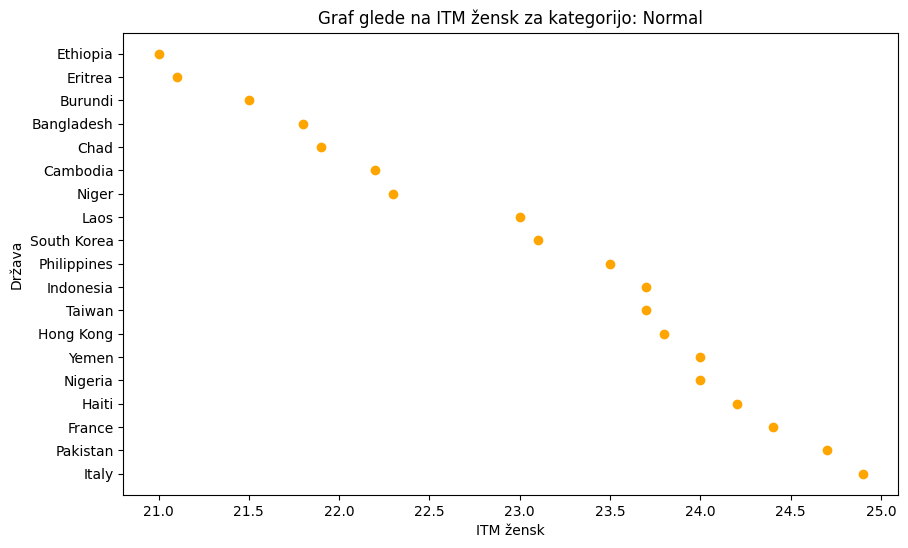

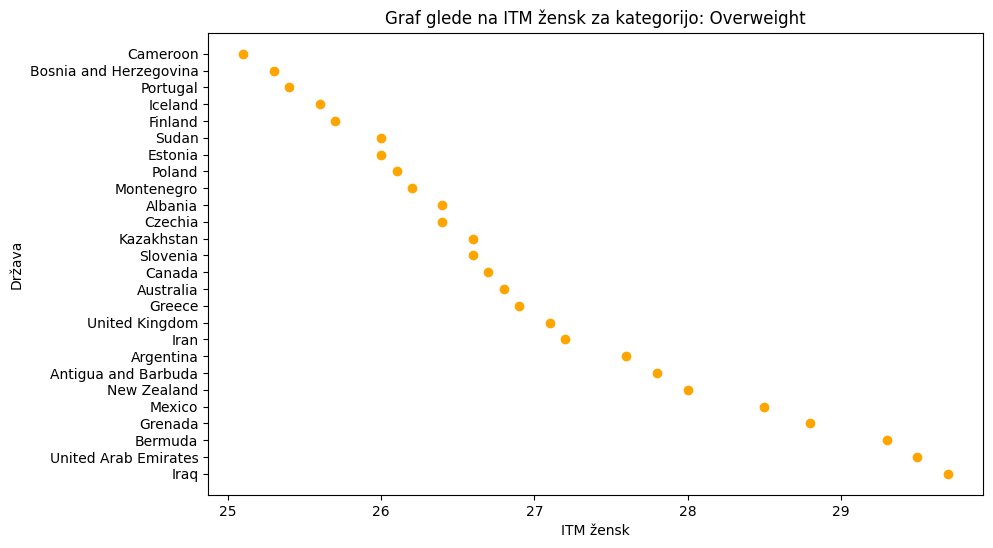

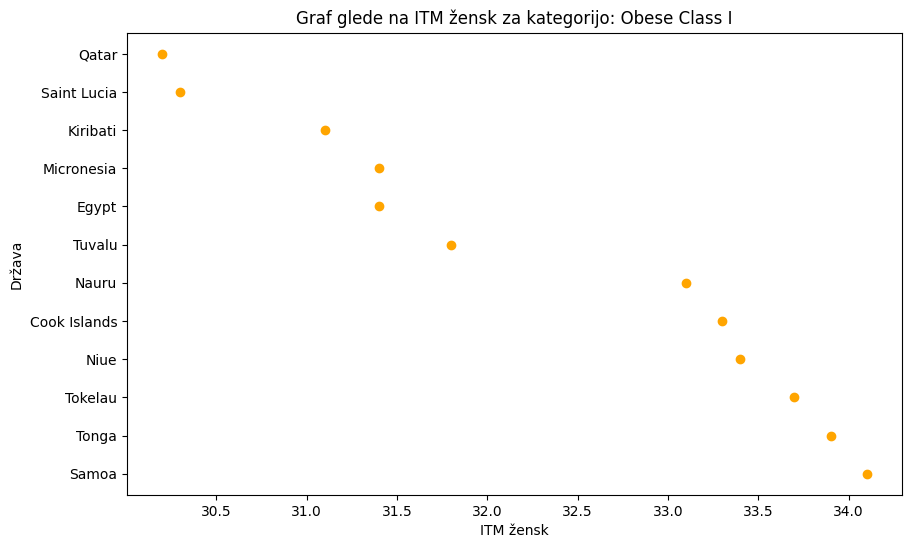

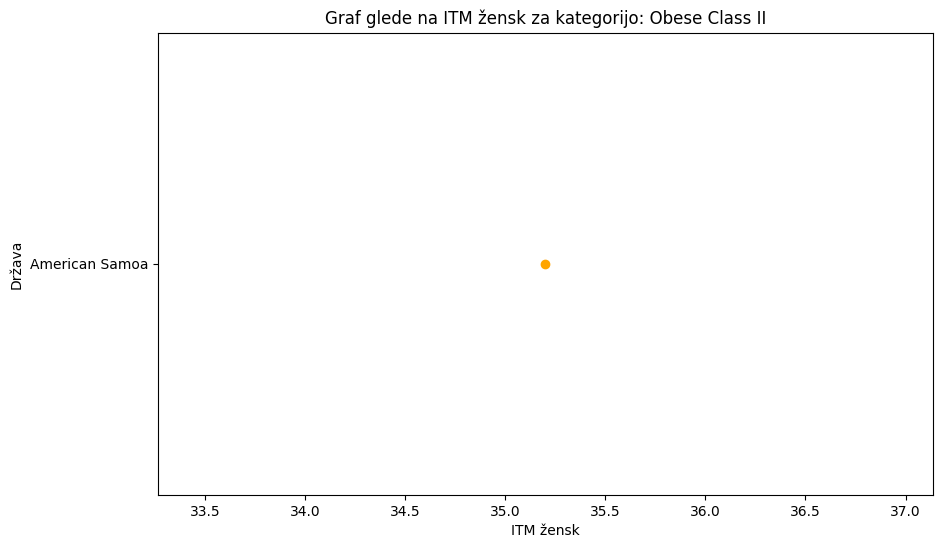

In [1972]:
def plot_category(category_data, category_name):
    countries = category_data['ime države']
    itm_values = category_data['ITM žensk']

    plt.figure(figsize=(10, 6))
    
    if len(countries) > 50:
        step = 3
    elif len(countries) > 30:
        step = 2
    else:
        step = 1

    plt.scatter(itm_values[::step], countries[::step], color='orange')
    plt.xlabel('ITM žensk')
    plt.ylabel('Država')
    plt.title(f'Graf glede na ITM žensk za kategorijo: {category_name}')
    plt.show()

for category, category_data in sorted_tables_by_category_female.items():
    plot_category(category_data, category)

#### 2.1.4. Razne primerjave med moškimi in ženskami

V sklopu primerjav ITM vrednosti je v povprečju ITM vrednost pri ženskah višja.

Naslednji računi prikazujejo kolikšna je povprečna ITM vrednost moškega in ženske glede na obravnavane države, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež je ITM vrednost pri ženskah višja kot pri moških ter kje se pojavi največja razlika med spoloma in kolikšna je. Za na konec me je še zanimalo, v katerih državah je pa le ITM moških višji od žensk, kolikšne so največje razlike med temi državami in kje so. Vse navedene podatke sem obravnavala glede na ITM klasifikacijo.

Opazimo, da je povprečna ITM vrednost za normalno telesno težo pri moških 22.7, pri ženskah pa 23.09, za povišano telesno težo pri moških 27.05, pri ženskah pa 26.95, za debelost 1. razreda pri moških 31.63, pri ženskah pa 32.31 in za debelost 2. razreda je le pri ženskah 35.2. 

ITM vrednost pri ženskah je za normalno telesno težo za 0.39 (1.69 %) višja kot pri moških, za povišano telesno težo za 0.1 (0.37 %) nižja kot pri moških in za debelost 1. razreda za 0.68 (2.1 %) višja kot pri moških.

Največja razlika med ITM vrednostjo moških in žensk za normalno telesno težo se je izkazala v Kenji (2.20), za povišano telesno težo v južni Afriki (4.40) in za debelost 1. razreda v Samoi (3.60).

Držav, ki imajo ITM vrednost pri moških višjo kot pri ženskah, je 53. Največja razlika v kategoriji normalne telesne teže je na Japonskem (1.70), v kategoriji povišane telesne teže pa v Španiji (2.10).



In [1973]:
def classify_countries(countries, categories, itm_column):
    classified_countries = {category: {'count': 0} for category in categories['kategorija']}
    
    for _, row in countries.iterrows():
        itm = float(row[itm_column])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_countries[bounds['kategorija']]['count'] += 1
                break
    
    return classified_countries

def create_category_counts_table(countries, categories):
    category_counts_male = classify_countries(countries, categories, 'ITM moških')
    category_counts_female = classify_countries(countries, categories, 'ITM žensk')
    
    data = []
    for category in categories['kategorija']:
        count_male = category_counts_male[category]['count']
        count_female = category_counts_female[category]['count']
        
        # vzamemo samo tiste kategorije, ki imajo vsaj eno državo
        if count_male + count_female > 0:
            data.append([category, count_male, count_female])
    
    df = pd.DataFrame(data, columns=['Kategorija', 'Št. držav glede na ITM moških', 'Št. držav glede na ITM žensk'])
    return df

category_counts_table = create_category_counts_table(countries, ITM)
print(category_counts_table)

       Kategorija  Št. držav glede na ITM moških  Št. držav glede na ITM žensk
0          Normal                             38                            37
1      Overweight                             81                            77
2   Obese Class I                              8                            12
3  Obese Class II                              0                             1


In [1974]:
for category, sorted_df in sorted_tables_by_category.items():
    average_itm = round(np.mean(sorted_df['ITM moških']), 2)
    print(f"Za kategorijo '{category}' je povprečna ITM vrednost moških: {average_itm}.")

Za kategorijo 'Normal' je povprečna ITM vrednost moških: 22.7.
Za kategorijo 'Overweight' je povprečna ITM vrednost moških: 27.05.
Za kategorijo 'Obese Class I' je povprečna ITM vrednost moških: 31.63.


In [1975]:
for category, sorted_df in sorted_tables_by_category_female.items():
    average_itm = round(np.mean(sorted_df['ITM žensk']), 2)
    print(f"Za kategorijo '{category}' je povprečna ITM vrednost žensk: {average_itm}.")

Za kategorijo 'Normal' je povprečna ITM vrednost žensk: 23.09.
Za kategorijo 'Overweight' je povprečna ITM vrednost žensk: 26.95.
Za kategorijo 'Obese Class I' je povprečna ITM vrednost žensk: 32.31.
Za kategorijo 'Obese Class II' je povprečna ITM vrednost žensk: 35.2.


In [1976]:
# izačunamo povprečje za moške in za ženske za vsako kategorijo posebej
average_itm_values = {}
for category, sorted_df_female in sorted_tables_by_category_female.items():
    if category in sorted_tables_by_category:  # preverimo, če je kategorija prisotna v moški tabeli
        sorted_df_male = sorted_tables_by_category[category]
        # to smo naredili, da dobimo vse vrednosti
        # (ženske ITM vrednosti so v 'sorted_df_female', ki so ločene od moških ITM vrednosti)
        average_itm_values[category] = { 
            'ITM moških': round(np.mean(sorted_df_male['ITM moških']), 2),
            'ITM žensk': round(np.mean(sorted_df_female['ITM žensk']), 2)
        }
    else: #  'Obese Class II' ni prisoten v moški tabeli, zato ga dodamo posebej
        average_itm_values[category] = { 
            'ITM moških': '/',  # lahko damo '/', ker vemo, da nimamo nobene vrednosti - če bi bila, bi se izpisala v prvem delu if stavka
            'ITM žensk': round(np.mean(sorted_df_female['ITM žensk']), 2)
        }

# ustvarimo DataFrame
average_itm_df = pd.DataFrame.from_dict(average_itm_values, orient='index') # da so namesto indeksov imena kategorij

print(average_itm_df)

               ITM moških  ITM žensk
Normal               22.7      23.09
Overweight          27.05      26.95
Obese Class I       31.63      32.31
Obese Class II          /      35.20


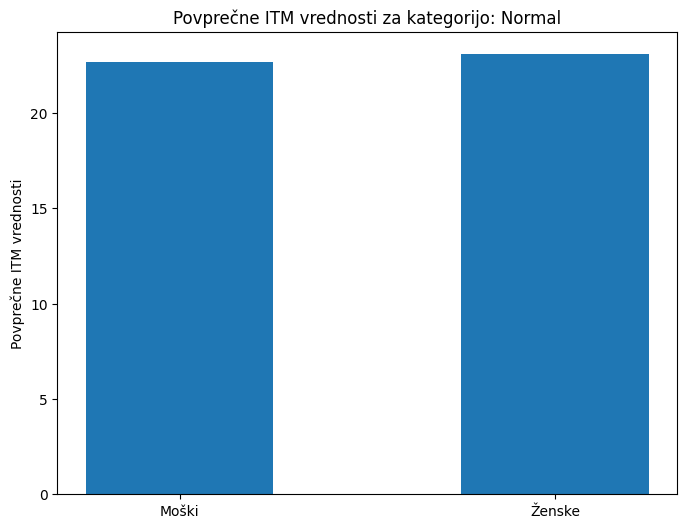

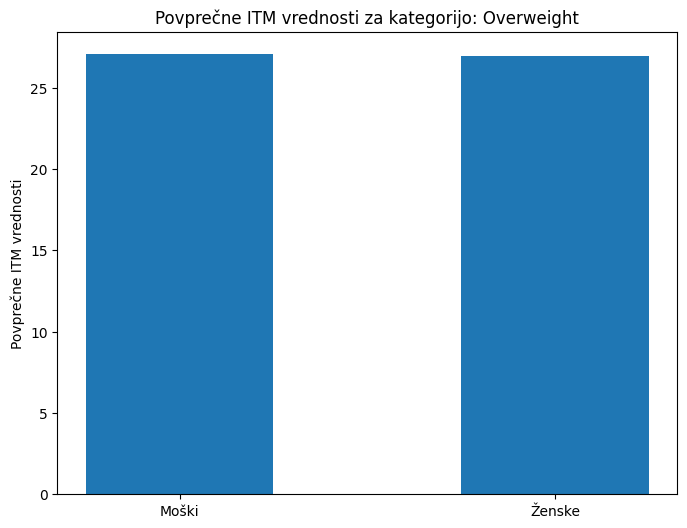

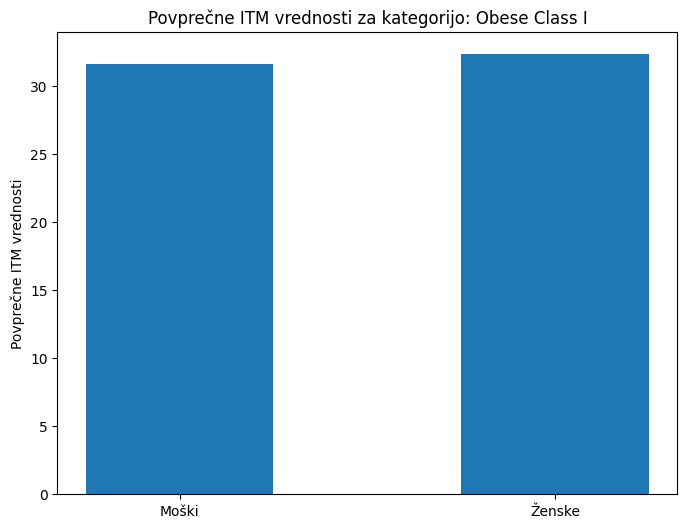

In [1977]:
def create_average_itm_plots(sorted_tables_by_category, sorted_tables_by_category_female):
    categories = sorted_tables_by_category.keys()

    for category in categories:
        sorted_df_male = sorted_tables_by_category[category]
        sorted_df_female = sorted_tables_by_category_female[category]

        # izračunamo povprečje
        avg_itm_male = round(np.mean(sorted_df_male['ITM moških']), 2)
        avg_itm_female = round(np.mean(sorted_df_female['ITM žensk']), 2)

        plt.figure(figsize=(8, 6))
        plt.bar(['Moški', 'Ženske'], [avg_itm_male, avg_itm_female], width = 0.5)
        plt.title(f'Povprečne ITM vrednosti za kategorijo: {category}')
        plt.ylabel('Povprečne ITM vrednosti')
        plt.show()

create_average_itm_plots(sorted_tables_by_category, sorted_tables_by_category_female)

Kolikšne so največje razlike med ITM vrednostmi in v katerih državah so?

In [1978]:
# ustvarimo slovar vsake države za vsako kategorijo; ključi bodo kategorije; vrednosti pa pari (država, razlika)
country_differences_by_category = {category: [] for category in sorted_tables_by_category.keys()}

# gremo skozi vse države in skozi vse kategorije
for category in sorted_tables_by_category.keys():
    sorted_df_male = sorted_tables_by_category[category]
    sorted_df_female = sorted_tables_by_category_female[category]
    
    for _, countriesM_row in sorted_df_male.iterrows(): # da dobimo državo in vrednost
        country = countriesM_row['ime države']
        itm_male = float(countriesM_row['ITM moških'])
        
        row_female = sorted_df_female[sorted_df_female['ime države'] == country] #najdemo še isto državo za ženske vrednosti
        
        if not row_female.empty: # preventivno preverimo, da ne bo prazna
            itm_female = float(row_female.iloc[0]['ITM žensk'])
            difference = abs(itm_male - itm_female)  # izračunamo absolutno razliko
            country_differences_by_category[category].append((country, difference)) # naredimo tuple (drzava, razlika)

# tabela
country_difference_dfs = {}
for category, differences in country_differences_by_category.items():
    sorted_differences = sorted(differences, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(sorted_differences, columns=['ime države', f'ITM razlika v kategoriji: {category}'])
    country_difference_dfs[category] = df

# prikaz rezultatov
for category, df in country_difference_dfs.items():
    print(f'Category: {category}')
    print(df)
    print('\n')

Category: Normal
     ime države  ITM razlika v kategoriji: Normal
0         Kenya                               2.2
1         Japan                               1.7
2      Pakistan                               1.4
3       Nigeria                               1.4
4   Afghanistan                               1.4
..          ...                               ...
25     Cambodia                               0.2
26        India                               0.2
27         Chad                               0.1
28      Vietnam                               0.0
29   East Timor                               0.0

[30 rows x 2 columns]


Category: Overweight
             ime države  ITM razlika v kategoriji: Overweight
0          South Africa                                   4.4
1              Dominica                                   4.1
2               Grenada                                   3.7
3               Bolivia                                   2.4
4   Antigua and Barbuda    

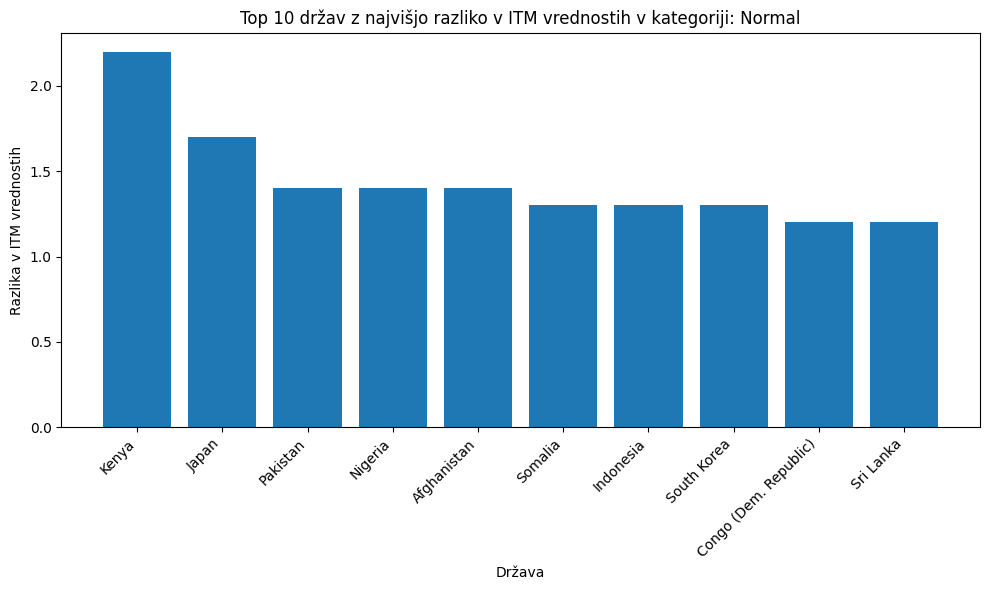

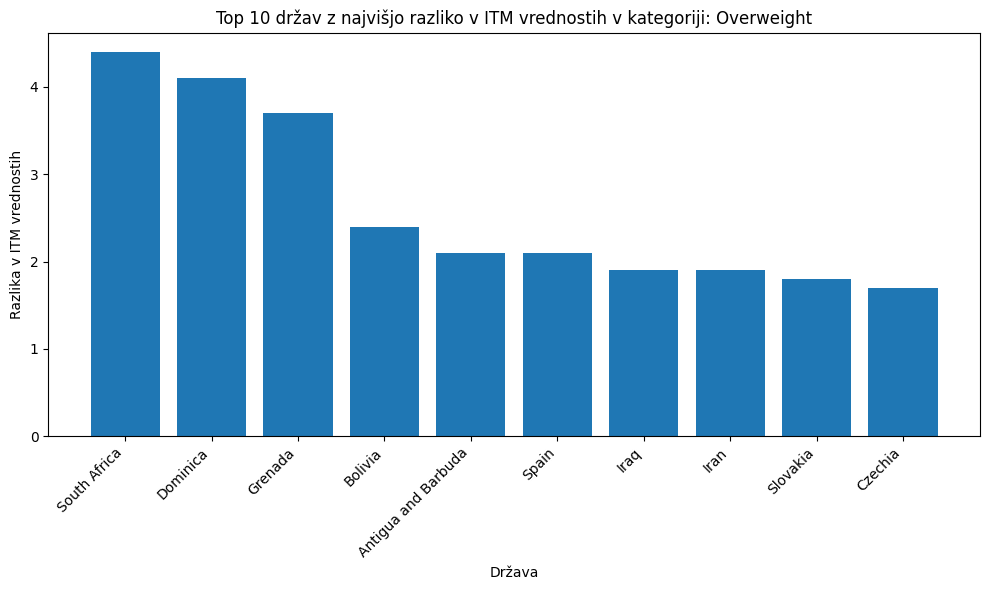

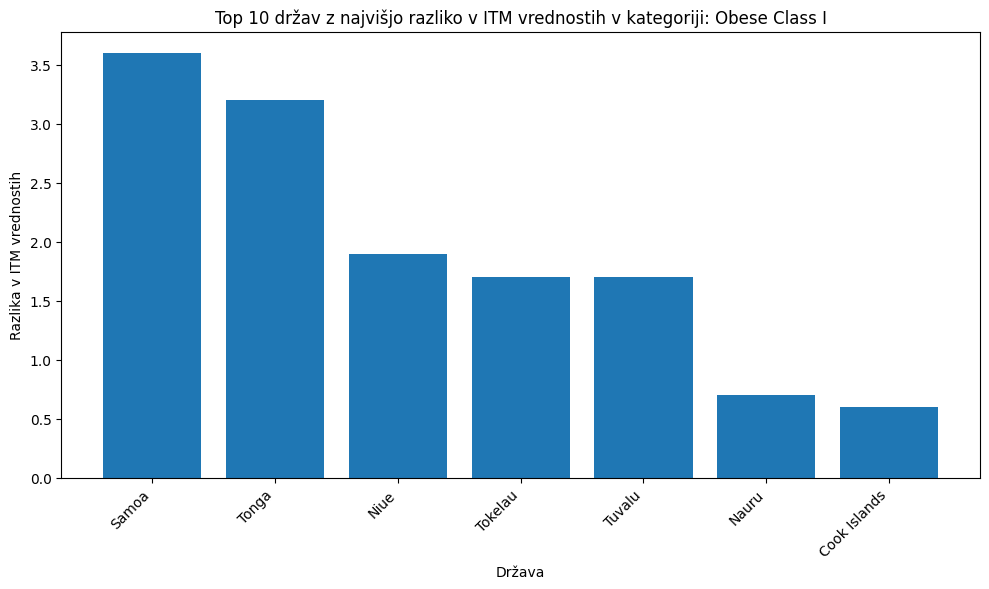

In [1979]:
for category, df in country_difference_dfs.items():
    if not df.empty: #izločimo prazne grafe
        plt.figure(figsize=(10, 6))
        top_10_df = df.head(10)  # izberemo 10 držav z največjo razliko 
        plt.bar(top_10_df['ime države'], top_10_df[f'ITM razlika v kategoriji: {category}'])
        plt.xlabel('Država')
        plt.ylabel('Razlika v ITM vrednostih')
        plt.title(f'Top 10 držav z najvišjo razliko v ITM vrednostih v kategoriji: {category}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [1980]:
def find_largest_difference_country(df):
    if not df.empty: # izločimo prazne podatke
        max_difference_row = df.iloc[0]
        country = max_difference_row['ime države']
        difference = max_difference_row[df.columns[-1]]  # v zadnjem stolpcu je razlika
        return country, difference
    else:
        return None, None

for category, df in country_difference_dfs.items():
    country, difference = find_largest_difference_country(df)
    if country and difference is not None:
        print(f"Največja razlika med ITM vrednostjo moških in žensk v kategoriji '{category}' je {difference:.2f}.")
        print(f'Ta razlika je prisotna na območju: {country}.\n')

Največja razlika med ITM vrednostjo moških in žensk v kategoriji 'Normal' je 2.20.
Ta razlika je prisotna na območju: Kenya.

Največja razlika med ITM vrednostjo moških in žensk v kategoriji 'Overweight' je 4.40.
Ta razlika je prisotna na območju: South Africa.

Največja razlika med ITM vrednostjo moških in žensk v kategoriji 'Obese Class I' je 3.60.
Ta razlika je prisotna na območju: Samoa.



Koliko so ITM vrednosti žensk večje od moških?

In [1981]:
for category, sorted_df in sorted_tables_by_category.items():
    average_itm_male = round(np.mean(sorted_df['ITM moških']), 2)
    average_itm_female = round(np.mean(sorted_tables_by_category_female[category]['ITM žensk']), 2)
    
    itm_difference = round(average_itm_female - average_itm_male, 2)
    
    print(f'Za kategorijo {category} je povprečna ITM vrednost moških: {average_itm_male}.')
    print(f'Povprečna ITM vrednost žensk: {average_itm_female}.')
    print(f'Razlika med ITM vrednostmi žensk in moških: {itm_difference}.\n')

Za kategorijo Normal je povprečna ITM vrednost moških: 22.7.
Povprečna ITM vrednost žensk: 23.09.
Razlika med ITM vrednostmi žensk in moških: 0.39.

Za kategorijo Overweight je povprečna ITM vrednost moških: 27.05.
Povprečna ITM vrednost žensk: 26.95.
Razlika med ITM vrednostmi žensk in moških: -0.1.

Za kategorijo Obese Class I je povprečna ITM vrednost moških: 31.63.
Povprečna ITM vrednost žensk: 32.31.
Razlika med ITM vrednostmi žensk in moških: 0.68.



In [1982]:
for category, sorted_df in sorted_tables_by_category.items():
    average_itm_male = round(np.mean(sorted_df['ITM moških']), 2)
    average_itm_female = round(np.mean(sorted_tables_by_category_female[category]['ITM žensk']), 2)
    
    itm_difference = round(average_itm_female - average_itm_male, 2)
    percentage_difference = round((itm_difference / average_itm_female) * 100, 2)
    
    if percentage_difference >= 0:
        print(f"Ženske ITM vrednosti so po državah v kategoriji '{category}' povprečno {round(percentage_difference, 2)} % višje od moških vrednosti.")
    else:
        print(f"Ženske ITM vrednosti so po državah v kategoriji '{category}' povprečno {abs(round(percentage_difference, 2))} % nižje od moških vrednosti.")

Ženske ITM vrednosti so po državah v kategoriji 'Normal' povprečno 1.69 % višje od moških vrednosti.
Ženske ITM vrednosti so po državah v kategoriji 'Overweight' povprečno 0.37 % nižje od moških vrednosti.
Ženske ITM vrednosti so po državah v kategoriji 'Obese Class I' povprečno 2.1 % višje od moških vrednosti.


Povprečno imajo ženske višjo vrednost. V katerih državah je obratno glede na vsako kategorijo?

In [1983]:
countries_with_higher_male_ITM = countries[countries['ITM moških'] > countries['ITM žensk']]

num_countries = len(countries_with_higher_male_ITM)
inversely_list = ', '.join(countries_with_higher_male_ITM['ime države']) #da ne bo output v [ ]

print('Število držav, kjer je ITM vrednost pri moških višja kot pri ženskah:', num_countries)
print('Seznam držav:', inversely_list)

Število držav, kjer je ITM vrednost pri moških višja kot pri ženskah: 53
Seznam držav: Netherlands, Montenegro, Estonia, Denmark, Bosnia and Herzegovina, Iceland, Czechia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Belgium, Greece, Switzerland, Australia, Ireland, Canada, Austria, France, Lebanon, Andorra, French Polynesia, Luxembourg, United Kingdom, New Zealand, Romania, Hungary, Spain, Israel, South Korea, China, Hong Kong, Argentina, Italy, Portugal, North Korea, Albania, Bulgaria, Taiwan, Singapore, Haiti, Japan, Chad, Burundi, Madagascar, Nepal


Kolikšne so največje razlike med ITM vrednostmi glede na posamične kategorije, kjer so moške vrednosti višje od ženskih, in v katerih državah so? 

Category: Normal
    ime države  ITM razlika v kategoriji: Normal
0        Japan                               1.7
1  South Korea                               1.3
2    Singapore                               1.1
3    Hong Kong                               0.7
4        China                               0.6
5   Madagascar                               0.4
6      Burundi                               0.3
7  North Korea                               0.2
8        Nepal                               0.2
9         Chad                               0.1




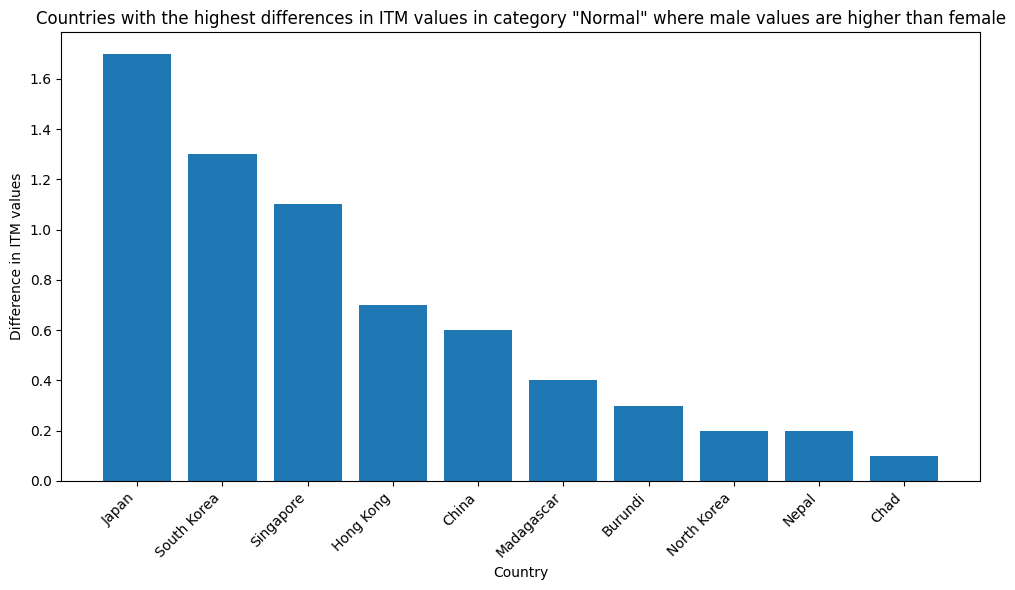

Category: Overweight
          ime države  ITM razlika v kategoriji: Overweight
0              Spain                                   2.1
1           Slovakia                                   1.8
2            Czechia                                   1.7
3            Hungary                                   1.6
4         Luxembourg                                   1.5
..               ...                                   ...
31           Romania                                   0.3
32         Argentina                                   0.3
33    United Kingdom                                   0.3
34       New Zealand                                   0.2
35  French Polynesia                                   0.1

[36 rows x 2 columns]




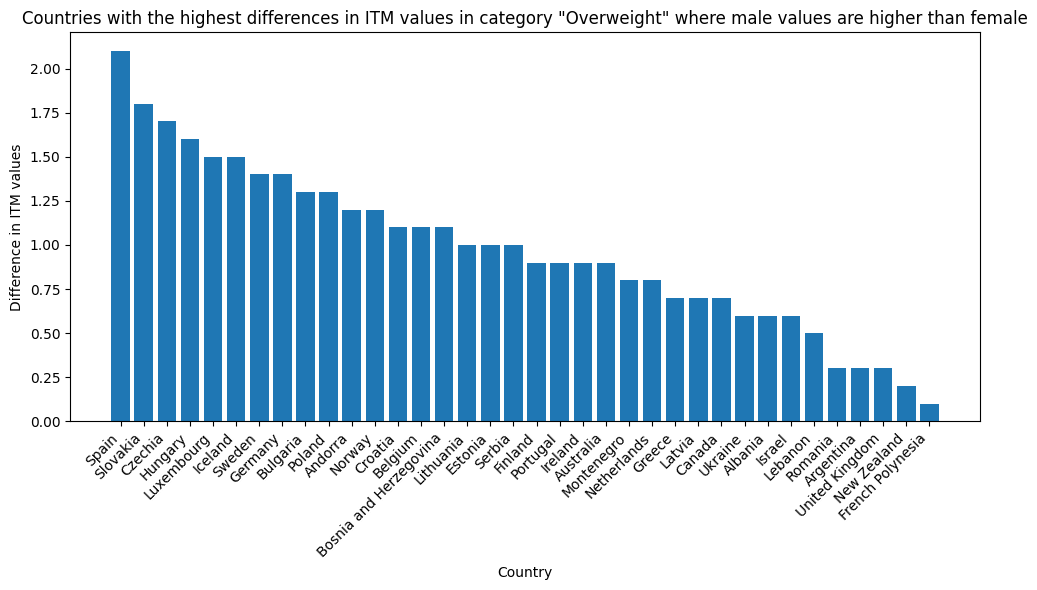

In [1984]:
# ustvarimo slovar vsake države za vsako kategorijo; ključi bodo kategorije; vrednosti pa pari (država, razlika)
country_differences_by_category = {category: [] for category in sorted_tables_by_category.keys()}

# gremo skozi vse države in skozi vse kategorije
for category in sorted_tables_by_category.keys():
    sorted_df_male = sorted_tables_by_category[category]
    sorted_df_female = sorted_tables_by_category_female[category]
    
    for _, countriesM_row in sorted_df_male.iterrows(): # da dobimo državo in vrednost
        country = countriesM_row['ime države']
        itm_male = float(countriesM_row['ITM moških'])  
        
        row_female = sorted_df_female[sorted_df_female['ime države'] == country] #najdemo še isto državo za ženske vrednosti
        
        if not row_female.empty: # preventivno preverimo, da ne bo prazna
            itm_female = float(row_female.iloc[0]['ITM žensk']) 
            if itm_male > itm_female:
                difference = itm_male - itm_female
                country_differences_by_category[category].append((country, difference))

# tabela
country_difference_dfs = {}
for category, differences in country_differences_by_category.items():
    sorted_differences = sorted(differences, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(sorted_differences, columns=['ime države', f'ITM razlika v kategoriji: {category}'])
    country_difference_dfs[category] = df


for category, df in country_difference_dfs.items():
    if not df.empty:
        print(f'Category: {category}')
        print(df)
        print('\n')
        
        plt.figure(figsize=(10, 6))
        plt.bar(df['ime države'], df[f'ITM razlika v kategoriji: {category}'])
        plt.xlabel('Country')
        plt.ylabel('Difference in ITM values')
        plt.title(f'Countries with the highest differences in ITM values in category "{category}" where male values are higher than female')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Kje je največja razlika med moškimi in ženskami in kolikšna je?

In [1985]:
for category, df in country_difference_dfs.items():
    country, difference = find_largest_difference_country(df)
    if country and difference is not None:
        print(f'Največja razlika med ITM vrednostjo moških in žensk v kategoriji {category} je {difference:.2f}.') # dva decimalna mesta
        print(f'Ta razlika je prisotna na območju: {country}.\n')

Največja razlika med ITM vrednostjo moških in žensk v kategoriji Normal je 1.70.
Ta razlika je prisotna na območju: Japan.

Največja razlika med ITM vrednostjo moških in žensk v kategoriji Overweight je 2.10.
Ta razlika je prisotna na območju: Spain.



### 2.2. Deli kontinentov 

In [1986]:
# po formuli izračunamo ITM
continents['ITM moških'] = continents['teža moških'] / (continents['višina moških'] ** 2)
continents['ITM žensk'] = continents['teža žensk'] / (continents['višina žensk'] ** 2)

print(continents)

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk  \
0   Northern Africa           1.73         77.9          1.61        73.7   
1    Eastern Africa           1.67         60.1          1.57        56.2   
2    Western Africa           1.70         64.9          1.59        60.1   
3   Southern Africa           1.69         71.2          1.59        73.2   
4    Central Africa           1.69         62.6          1.58        58.0   
..              ...            ...          ...           ...         ...   
17  Northern Europe           1.79         87.1          1.65        72.3   
18   Eastern Europe           1.78         83.8          1.65        72.2   
19        Polynesia           1.76         93.8          1.65        87.3   
20        Melanesia           1.64         68.1          1.57        64.6   
21       Micronesia           1.69         82.7          1.59        78.9   

    ITM moških  ITM žensk  
0    26.028267  28.432545  
1    21.549715  22.

In [1987]:
# dodatek, da so stolpci tabele v istem vrstnem redu kot pri ostalih tabelah
desired_columns = ['del kontinenta', 'višina moških', 'teža moških', 'ITM moških', 'višina žensk', 'teža žensk', 'ITM žensk']
urejena_tabela_continents = continents[desired_columns].round(2)

print(urejena_tabela_continents)

     del kontinenta  višina moških  teža moških  ITM moških  višina žensk  \
0   Northern Africa           1.73         77.9       26.03          1.61   
1    Eastern Africa           1.67         60.1       21.55          1.57   
2    Western Africa           1.70         64.9       22.46          1.59   
3   Southern Africa           1.69         71.2       24.93          1.59   
4    Central Africa           1.69         62.6       21.92          1.58   
..              ...            ...          ...         ...           ...   
17  Northern Europe           1.79         87.1       27.18          1.65   
18   Eastern Europe           1.78         83.8       26.45          1.65   
19        Polynesia           1.76         93.8       30.28          1.65   
20        Melanesia           1.64         68.1       25.32          1.57   
21       Micronesia           1.69         82.7       28.96          1.59   

    teža žensk  ITM žensk  
0         73.7      28.43  
1         56.2     

#### 2.2.1. Moški

V spodnji funkciji lahko vidimo razporeditev delov kontinentov glede na ITM klasifikacijo po moških ITM vrednostih. V kategoriji normalne telesne teže je 7 delov kontinentov, v kategoriji povišane telesne teže jih je 14, v kategoriji debelosti 1. razreda pa eden.

In [1988]:
def classify_and_print_continents(urejena_tabela_continents, categories):
    classified_continents = {category: {'continents': [], 'count': 0} for category in categories['kategorija']}
    category_counts = {}  
    
    for _, row in urejena_tabela_continents.iterrows():
        continent = row['del kontinenta']
        itm = float(row['ITM moških'])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_continents[bounds['kategorija']]['continents'].append(continent)
                classified_continents[bounds['kategorija']]['count'] += 1
                break
    
    for category, data in classified_continents.items():
        count = data['count']
        continents_list = data['continents']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobenega dela kontinenta.")
        else:
            continent_list_str = ', '.join(continents_list)
            total_continents = len(continents_list)
            print(f"V kategoriji '{category}' so naslednji deli kontinentov: {continent_list_str}. Število vseh delov kontinentov je {total_continents}.")
        category_counts[category] = count
    
    return category_counts

category_counts_continents = classify_and_print_continents(urejena_tabela_continents, ITM)

V kategoriji 'Severe Thinness' ni nobenega dela kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega dela kontinenta.
V kategoriji 'Mild Thinness' ni nobenega dela kontinenta.
V kategoriji 'Normal' so naslednji deli kontinentov: Eastern Africa, Western Africa, Southern Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh delov kontinentov je 7.
V kategoriji 'Overweight' so naslednji deli kontinentov: Northern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia, Micronesia. Število vseh delov kontinentov je 14.
V kategoriji 'Obese Class I' so naslednji deli kontinentov: Polynesia. Število vseh delov kontinentov je 1.
V kategoriji 'Obese Class II' ni nobenega dela kontinenta.
V kategoriji 'Obese Class III' ni nobenega dela kontinenta.


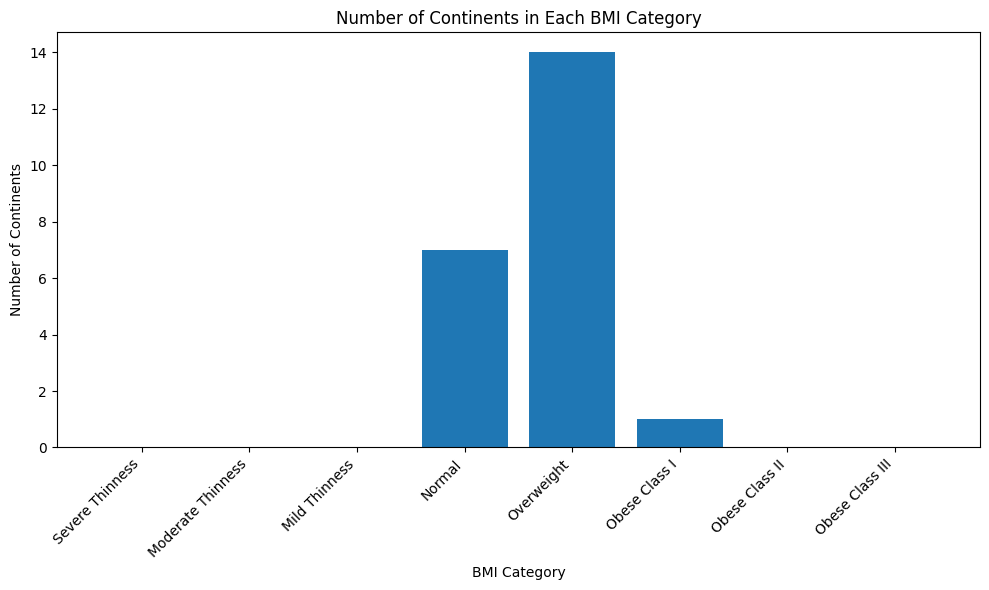

In [1989]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_continents.keys(), category_counts_continents.values())
plt.xlabel('BMI Category')
plt.ylabel('Number of Continents')
plt.title('Number of Continents in Each BMI Category')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 2.2.2. Ženske

V spodnji funkciji lahko vidimo razporeditev delov kontinentov glede na ITM klasifikacijo po moških ITM vrednostih. V kategoriji normalne telesne teže je 6 delov kontinentov, v kategoriji povišane telesne teže jih je 14 in v kategoriji debelosti 1. razreda pa sta dva.

In [1990]:
def classify_and_print_continents_female(urejena_tabela_continents, categories):
    classified_continents = {category: {'continents': [], 'count': 0} for category in categories['kategorija']}
    category_counts = {} 

    for _, row in urejena_tabela_continents.iterrows():
        continent = row['del kontinenta']
        itm = float(row['ITM žensk'])
        
        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_continents[bounds['kategorija']]['continents'].append(continent)
                classified_continents[bounds['kategorija']]['count'] += 1
                break
    
    for category, data in classified_continents.items():
        count = data['count']
        continents_list = data['continents']
        
        if count == 0:
            print(f"V kategoriji '{category}' ni nobenega kontinenta.")
        else:
            continent_list_str = ', '.join(continents_list)
            total_continents = len(continents_list)
            print(f"V kategoriji '{category}' so naslednji kontinenti: {continent_list_str}. Število vseh kontinentov je {total_continents}.")
        category_counts[category] = count
    
    return category_counts

category_counts_f = classify_and_print_continents_female(urejena_tabela_continents, ITM)

V kategoriji 'Severe Thinness' ni nobenega kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega kontinenta.
V kategoriji 'Mild Thinness' ni nobenega kontinenta.
V kategoriji 'Normal' so naslednji kontinenti: Eastern Africa, Western Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh kontinentov je 6.
V kategoriji 'Overweight' so naslednji kontinenti: Northern Africa, Southern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia. Število vseh kontinentov je 14.
V kategoriji 'Obese Class I' so naslednji kontinenti: Polynesia, Micronesia. Število vseh kontinentov je 2.
V kategoriji 'Obese Class II' ni nobenega kontinenta.
V kategoriji 'Obese Class III' ni nobenega kontinenta.


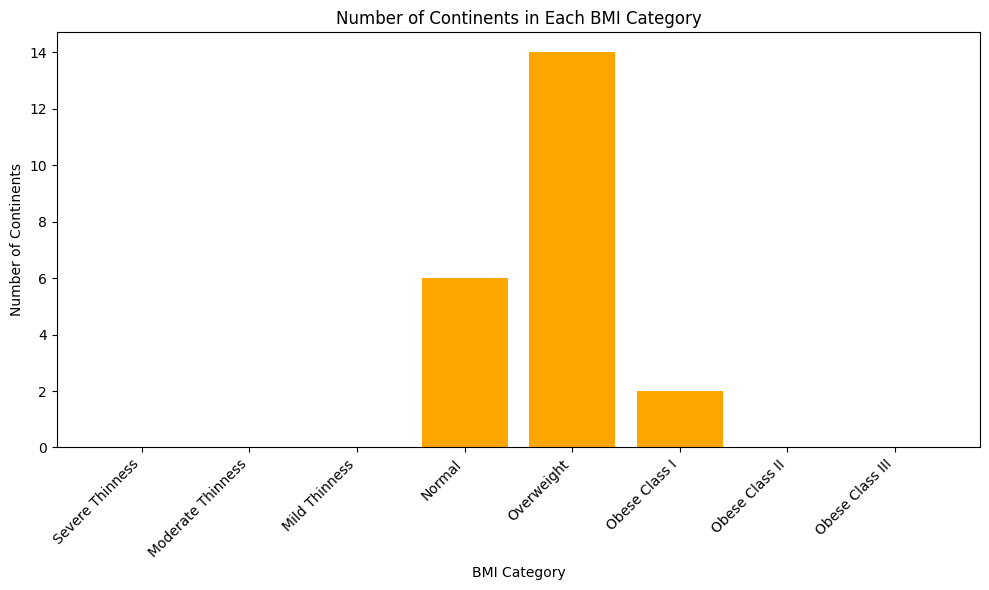

In [1991]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts_f.keys(), category_counts_f.values(), color='orange')
plt.xlabel('BMI Category')
plt.ylabel('Number of Continents')
plt.title('Number of Continents in Each BMI Category')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 2.2.3. Razvrstitve po kategorijah

In [1992]:
def create_sorted_tables_by_category_male_c(urejena_tabela_continents, itm, categories):
    classified_continents = {category: {'continents': []} for category in categories}
    
    for _, row in urejena_tabela_continents.iterrows():
        continent = row['del kontinenta']
        itm_value = float(row['ITM moških'])  
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_continents[bounds['kategorija']]['continents'].append((continent, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_continents.items():
        continents_list = data['continents']
        
        if continents_list:
            sorted_continents = sorted(continents_list, key=lambda x: x[1], reverse=True)  
            sorted_df_c = pd.DataFrame(sorted_continents, columns=['del kontinenta', 'ITM moških'], index=range(1, len(sorted_continents) + 1))
            sorted_tables[category] = sorted_df_c
    
    return sorted_tables

sorted_tables_by_category_male_c = create_sorted_tables_by_category_male_c(urejena_tabela_continents, ITM, ITM['kategorija'])
for category, sorted_df_c in sorted_tables_by_category_male_c.items():
    print(f'Category: {category}')
    print(sorted_df_c)
    print('\n')

Category: Normal
    del kontinenta  ITM moških
1  Southern Africa       24.93
2        East Asia       24.21
3   Southeast Asia       22.52
4   Western Africa       22.46
5       South Asia       22.10
6   Central Africa       21.92
7   Eastern Africa       21.55


Category: Overweight
           del kontinenta  ITM moških
1              Micronesia       28.96
2           North America       28.57
3   Australia/New Zealand       27.90
4            Western Asia       27.24
5         Northern Europe       27.18
6         Southern Europe       26.86
7          Western Europe       26.57
8           South America       26.53
9          Eastern Europe       26.45
10           Central Asia       26.33
11        Central America       26.22
12        Northern Africa       26.03
13              Caribbean       26.03
14              Melanesia       25.32


Category: Obese Class I
  del kontinenta  ITM moških
1      Polynesia       30.28




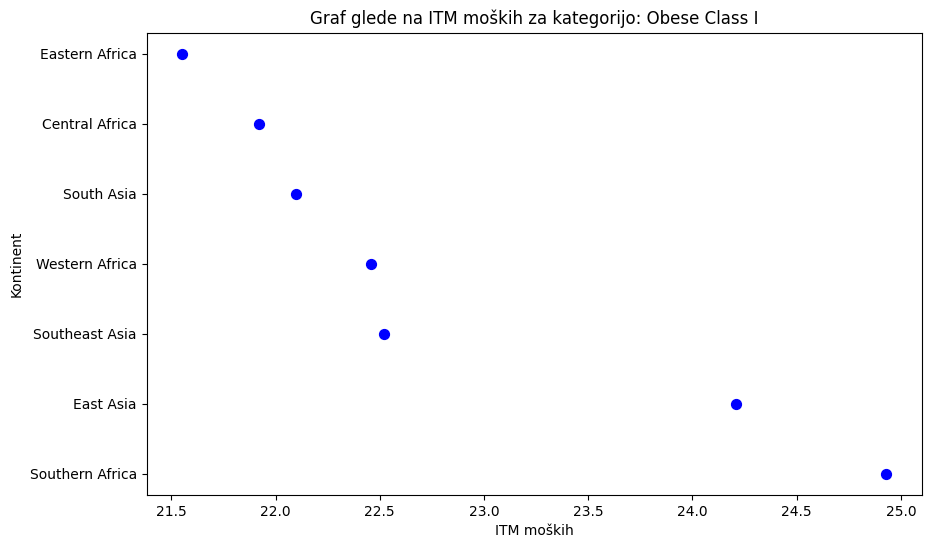

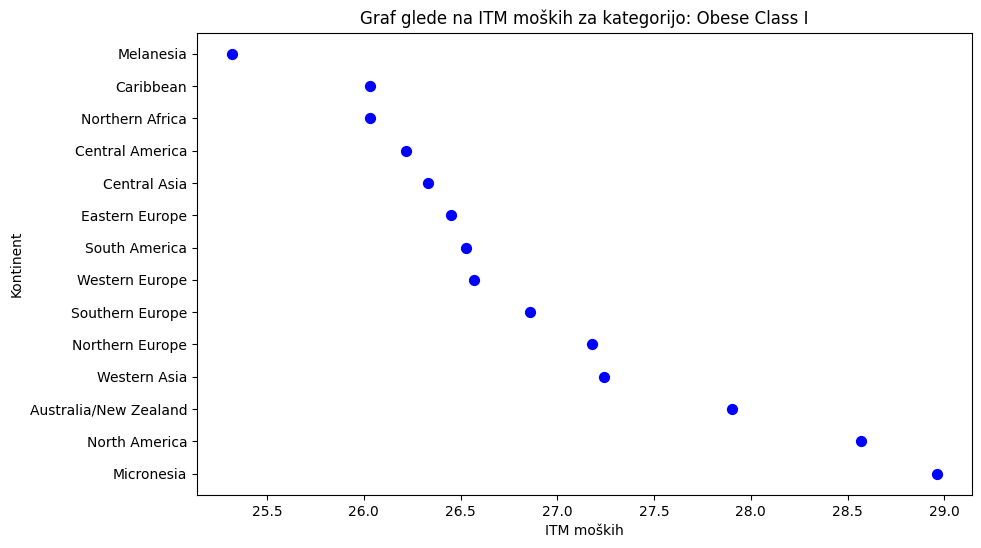

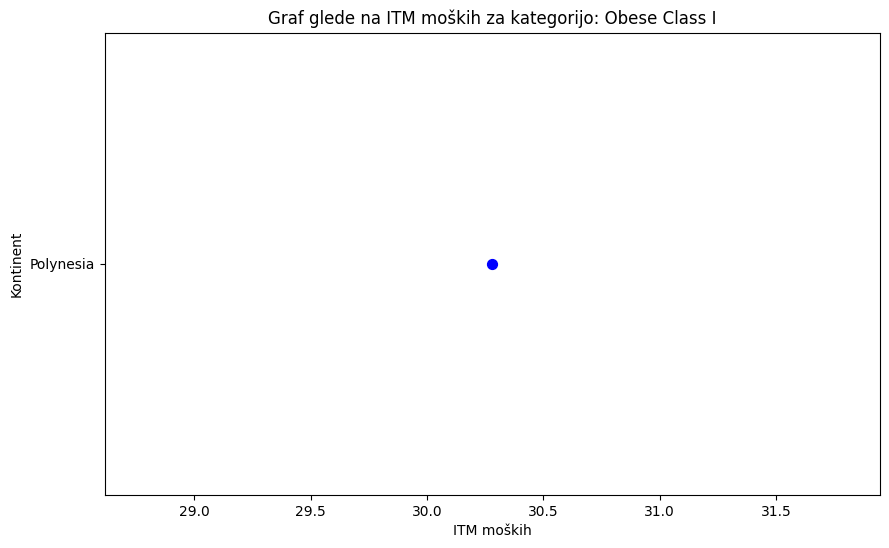

In [1993]:
def generate_male_scatter_plots(sorted_tables):
    for category_c, sorted_df_c in sorted_tables.items():
        continents = sorted_df_c['del kontinenta']
        itm_values = sorted_df_c['ITM moških']  

        plt.figure(figsize=(10, 6))
        
        plt.scatter(itm_values, continents, color='blue', marker='o', s=50)
        plt.xlabel('ITM moških')
        plt.ylabel('Kontinent')
        plt.title(f'Graf glede na ITM moških za kategorijo: {category}')
        plt.show()

generate_male_scatter_plots(sorted_tables_by_category_male_c)

In [1994]:
def create_sorted_tables_by_category_female_c(urejena_tabela_continents, itm, categories):
    classified_continents = {category: {'continents': []} for category in categories}
    
    for _, row in urejena_tabela_continents.iterrows():
        continent = row['del kontinenta']
        itm_value = float(row['ITM žensk'])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_continents[bounds['kategorija']]['continents'].append((continent, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_continents.items():
        continents_list = data['continents']
        
        if continents_list:
            sorted_continents = sorted(continents_list, key=lambda x: x[1], reverse=True)  
            sorted_df = pd.DataFrame(sorted_continents, columns=['del kontinenta', 'ITM žensk'], index=range(1, len(sorted_continents) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables

sorted_tables_by_category_female_c = create_sorted_tables_by_category_female_c(urejena_tabela_continents, ITM, ITM['kategorija'])
for category, sorted_df in sorted_tables_by_category_female_c.items():
    print(f'Category: {category}')
    print(sorted_df)
    print('\n')

Category: Normal
   del kontinenta  ITM žensk
1  Western Africa      23.77
2  Southeast Asia      23.60
3       East Asia      23.47
4  Central Africa      23.23
5  Eastern Africa      22.80
6      South Asia      22.48


Category: Overweight
           del kontinenta  ITM žensk
1         Southern Africa      28.95
2           North America      28.62
3            Western Asia      28.56
4         Northern Africa      28.43
5         Central America      27.87
6           South America      27.03
7            Central Asia      27.03
8   Australia/New Zealand      26.85
9               Caribbean      26.58
10        Northern Europe      26.56
11         Eastern Europe      26.52
12              Melanesia      26.21
13        Southern Europe      25.18
14         Western Europe      25.11


Category: Obese Class I
  del kontinenta  ITM žensk
1      Polynesia      32.07
2     Micronesia      31.21




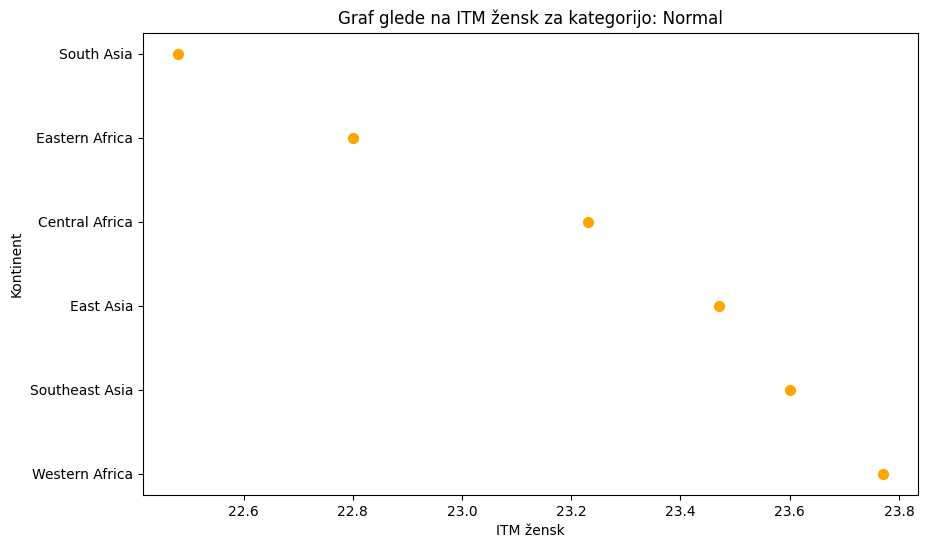

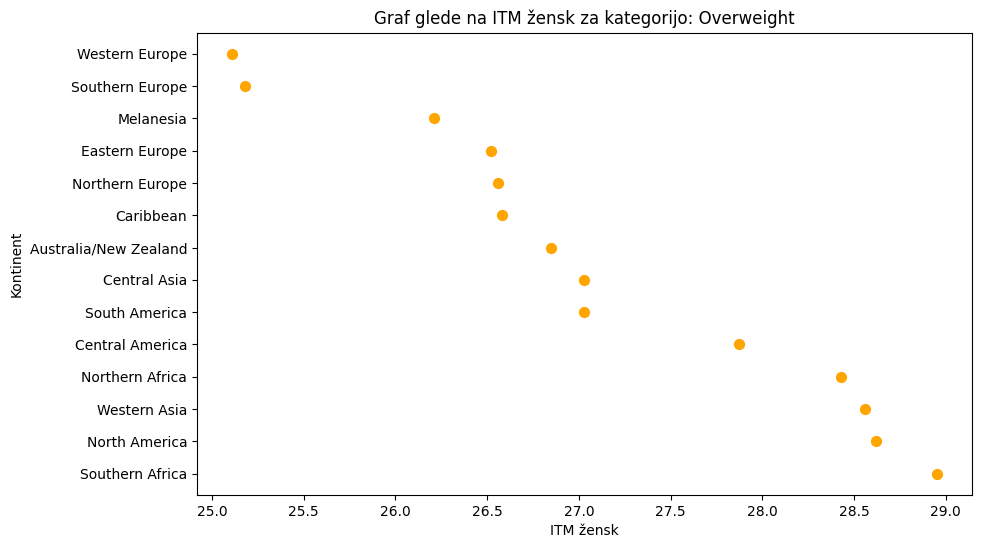

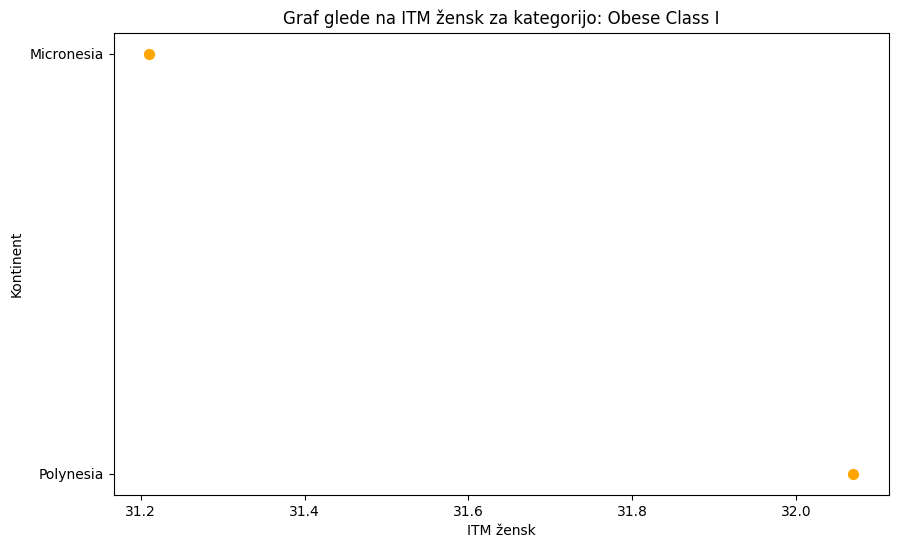

In [1995]:
def generate_female_scatter_plots(sorted_tables):
    for category, sorted_df in sorted_tables.items():
        continents = sorted_df['del kontinenta']
        itm_values = sorted_df['ITM žensk']

        plt.figure(figsize=(10, 6))
        
        plt.scatter(itm_values, continents, color='orange', marker='o', s=50)
        plt.xlabel('ITM žensk')
        plt.ylabel('Kontinent')
        plt.title(f'Graf glede na ITM žensk za kategorijo: {category}')
        plt.show()

generate_female_scatter_plots(sorted_tables_by_category_female_c)

#### 2.2.4. Razne primerjave med moškimi in ženskami

V sklopu primerjav ITM vrednosti je v povprečju ITM vrednost pri ženskah višja.

Naslednji računi prikazujejo kolikšna je povprečna ITM vrednost moškega in ženske glede na obravnavane dele kontinentov, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež je ITM vrednost pri ženskah višja kot pri moških ter kje se pojavi največja razlika med spoloma in kolikšna je. Za na konec me je še zanimalo, v katerih delih kontinentov je pa le ITM moških višji od žensk, kolikšne so največje razlike med temi deli kontinentov in kje so. Vse navedene podatke sem obravnavala glede na ITM klasifikacijo.

Opazimo, da je povprečna ITM vrednost za normalno telesno težo pri moških 22.81, pri ženskah pa 23.22, za povišano telesno težo pri moških 26.87, pri ženskah pa 27.11 in za debelost 1. razreda pri moških 30.28, pri ženskah pa 31.64.

ITM vrednost pri ženskah je za normalno telesno težo za 0.41 (1.77 %) višja kot pri moških, za povišano telesno težo za 0.24 (0.89 %) višja kot pri moških in za debelost 1. razreda za 1.36 (4.3 %) višja kot pri moških.

Največja razlika med ITM vrednostjo moških in žensk za normalno telesno težo se je izkazala v zahodni Afriki (1.31), za povišano telesno težo v severni Afriki (2.40) in za debelost 1. razreda v Polineziji (1.79).

Delov kontinentov, ki imajo ITM vrednost pri moških višjo kot pri ženskah, je 5. Največja razlika v kategoriji normalne telesne teže (in tudi edina) je v vzhodni Aziji (0.74), v kategoriji povišane telesne teže pa v južni Evropi (1.68).

In [1996]:
def classify_continents(urejena_tabela_continents, categories_c, itm_column):
    classified_continents = {category_c: {'count': 0} for category_c in categories_c['kategorija']}
    
    for _, row in urejena_tabela_continents.iterrows():
        itm = float(row[itm_column])
        
        for _, bounds in categories_c.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm < upper_bound:
                classified_continents[bounds['kategorija']]['count'] += 1
                break
    
    return classified_continents

def create_category_counts_table_c(urejena_tabela_continents, categories_c):
    category_counts_male = classify_continents(urejena_tabela_continents, categories_c, 'ITM moških')
    category_counts_female = classify_continents(urejena_tabela_continents, categories_c, 'ITM žensk')
    
    data = []
    for category_c in categories_c['kategorija']:
        count_male = category_counts_male[category_c]['count']
        count_female = category_counts_female[category_c]['count']
        
        # vzamemo samo tiste kategorije, ki imajo vsaj eno državo
        if count_male + count_female > 0:
            data.append([category_c, count_male, count_female])
    
    df = pd.DataFrame(data, columns=['Kategorija', 'Št. držav glede na ITM moških', 'Št. držav glede na ITM žensk'])
    return df

category_counts_table_c = create_category_counts_table_c(urejena_tabela_continents, ITM)
print(category_counts_table_c)

      Kategorija  Št. držav glede na ITM moških  Št. držav glede na ITM žensk
0         Normal                              7                             6
1     Overweight                             14                            14
2  Obese Class I                              1                             2


In [1997]:
for category_c, sorted_df_c in sorted_tables_by_category_male_c.items():
    average_itm_c = round(np.mean(sorted_df_c['ITM moških']), 2)
    print(f'Za kategorijo {category_c} je povprečna ITM vrednost moških: {average_itm_c}.')

Za kategorijo Normal je povprečna ITM vrednost moških: 22.81.
Za kategorijo Overweight je povprečna ITM vrednost moških: 26.87.
Za kategorijo Obese Class I je povprečna ITM vrednost moških: 30.28.


In [1998]:
for category_c, sorted_df_c in sorted_tables_by_category_female_c.items():
    average_itm_c = round(np.mean(sorted_df_c['ITM žensk']), 2)
    print(f'Za kategorijo {category_c} je povprečna ITM vrednost žensk: {average_itm_c}.')

Za kategorijo Normal je povprečna ITM vrednost žensk: 23.22.
Za kategorijo Overweight je povprečna ITM vrednost žensk: 27.11.
Za kategorijo Obese Class I je povprečna ITM vrednost žensk: 31.64.


In [1999]:
# izačunamo povprečje za moške in za ženske za vsako kategorijo posebej
average_itm_values_c = {}
for category_c, sorted_df_female_c in sorted_tables_by_category_female_c.items():
    sorted_df_male_c = sorted_tables_by_category_male_c[category_c]
    # to smo naredili, da dobimo vse vrednosti
    # (ženske ITM vrednosti so v 'sorted_df_female_c', ki so ločene od moških ITM vrednosti)
    average_itm_values_c[category_c] = { 
        'ITM moških': round(np.mean(sorted_df_male_c['ITM moških']), 2),
        'ITM žensk': round(np.mean(sorted_df_female_c['ITM žensk']), 2)
    }
    
# ustvarimo DataFrame
average_itm_df_c = pd.DataFrame.from_dict(average_itm_values_c, orient='index') # da so namesto indeksov imena kategorij

print(average_itm_df_c)

               ITM moških  ITM žensk
Normal              22.81      23.22
Overweight          26.87      27.11
Obese Class I       30.28      31.64


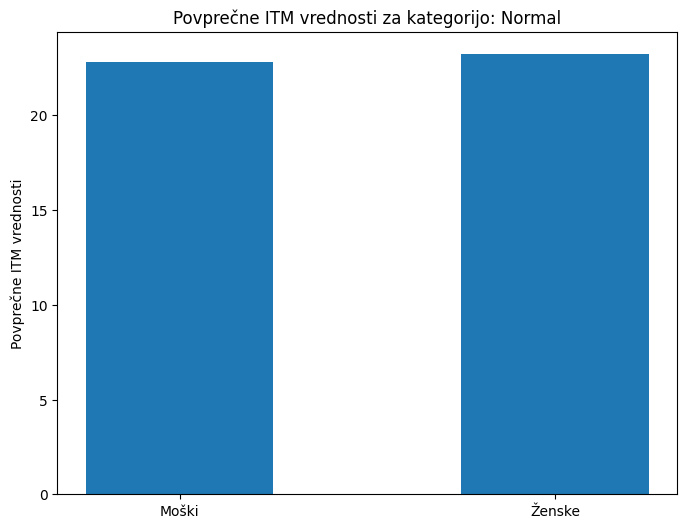

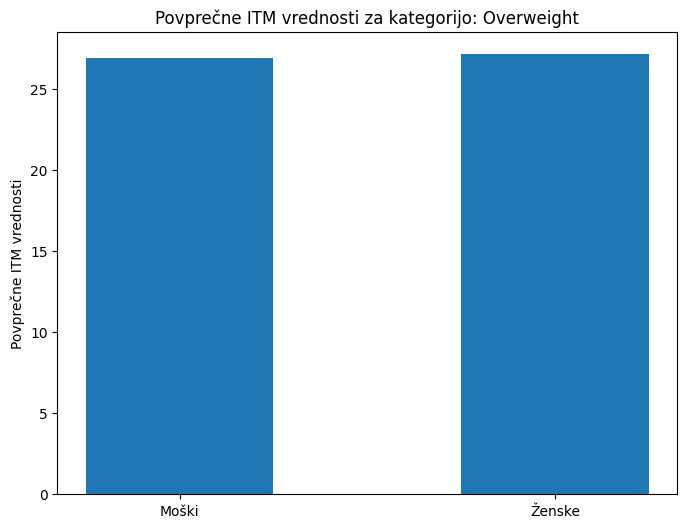

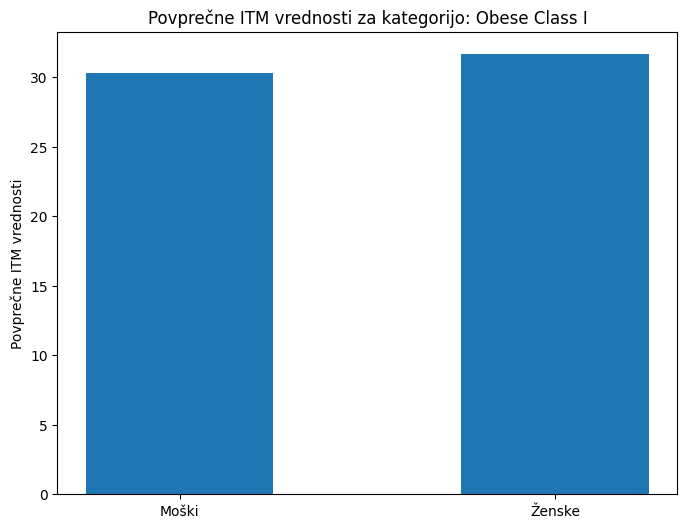

In [2000]:
def create_average_itm_plots_c(sorted_tables_by_category_male_c, sorted_tables_by_category_female_c):
    categories_c = sorted_tables_by_category_male_c.keys()

    for category_c in categories_c:
        sorted_df_male_c = sorted_tables_by_category_male_c[category_c]
        sorted_df_female_c = sorted_tables_by_category_female_c[category_c]

        # izračunamo povprečje
        avg_itm_male_c = round(np.mean(sorted_df_male_c['ITM moških']), 2)
        avg_itm_female_c = round(np.mean(sorted_df_female_c['ITM žensk']), 2)

        plt.figure(figsize=(8, 6))
        plt.bar(['Moški', 'Ženske'], [avg_itm_male_c, avg_itm_female_c], width = 0.5)
        plt.title(f'Povprečne ITM vrednosti za kategorijo: {category_c}')
        plt.ylabel('Povprečne ITM vrednosti')
        plt.show()

create_average_itm_plots_c(sorted_tables_by_category_male_c, sorted_tables_by_category_female_c)

Kolikšne so največje razlike med ITM vrednostmi in v katerih delih kontinentov so?

In [2001]:
# ustvarimo slovar vsake države za vsako kategorijo; ključi bodo kategorije; vrednosti pa pari (država, razlika)
continent_differences_by_category = {category_c: [] for category_c in sorted_tables_by_category_male_c.keys()}

# gremo skozi vse dele kontinentov in skozi vse kategorije
for category_c in sorted_tables_by_category_male_c.keys():
    sorted_df_male_c = sorted_tables_by_category_male_c[category_c]
    sorted_df_female_c = sorted_tables_by_category_female_c[category_c]
    
    for _, row_male_c in sorted_df_male_c.iterrows(): # da dobimo državo in vrednost
        continent = row_male_c['del kontinenta']
        itm_male_c = float(row_male_c['ITM moških'])
        
        row_female_c = sorted_df_female_c[sorted_df_female_c['del kontinenta'] == continent] #najdemo še isti del kontinenta za ženske vrednosti
        
        if not row_female_c.empty: # preventivno preverimo, da ne bo prazna
            itm_female_c = float(row_female_c.iloc[0]['ITM žensk'])
            difference_c = abs(itm_male_c - itm_female_c) # izračunamo absolutno razliko
            continent_differences_by_category[category_c].append((continent, difference_c))

continent_difference_dfs = {}
for category_c, differences_c in continent_differences_by_category.items():
    sorted_differences_c = sorted(differences_c, key=lambda x: x[1], reverse=True)
    df_c = pd.DataFrame(sorted_differences_c, columns=['del kontinenta', f'ITM razlika v kategoriji: {category_c}'])
    continent_difference_dfs[category_c] = df_c

for category_c, df_c in continent_difference_dfs.items():
    print(f'Category: {category_c}')
    print(df_c)
    print('\n')

Category: Normal
   del kontinenta  ITM razlika v kategoriji: Normal
0  Western Africa                              1.31
1  Central Africa                              1.31
2  Eastern Africa                              1.25
3  Southeast Asia                              1.08
4       East Asia                              0.74
5      South Asia                              0.38


Category: Overweight
           del kontinenta  ITM razlika v kategoriji: Overweight
0         Northern Africa                                  2.40
1         Southern Europe                                  1.68
2         Central America                                  1.65
3          Western Europe                                  1.46
4            Western Asia                                  1.32
5   Australia/New Zealand                                  1.05
6               Melanesia                                  0.89
7            Central Asia                                  0.70
8         Northern E

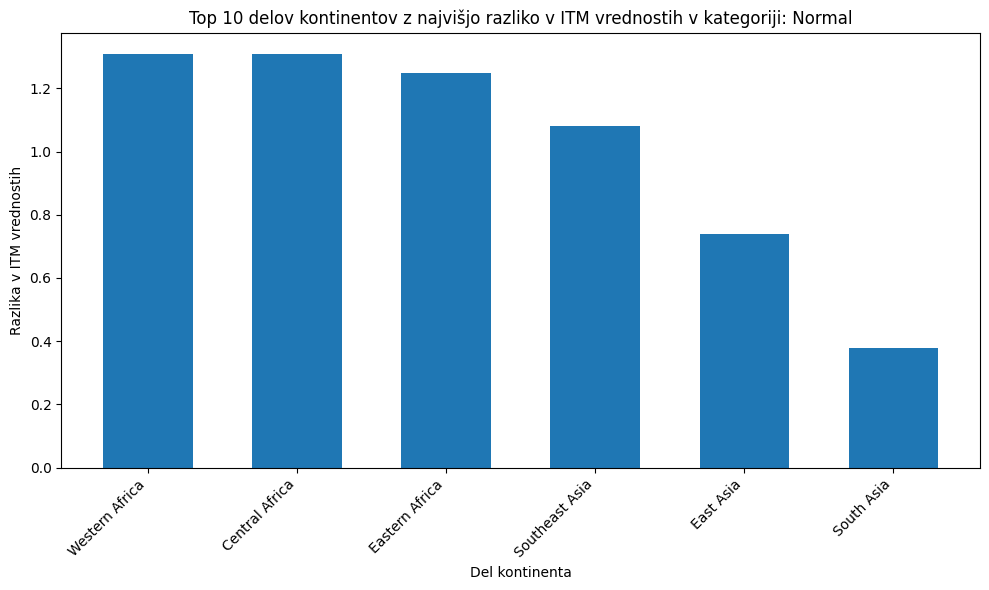

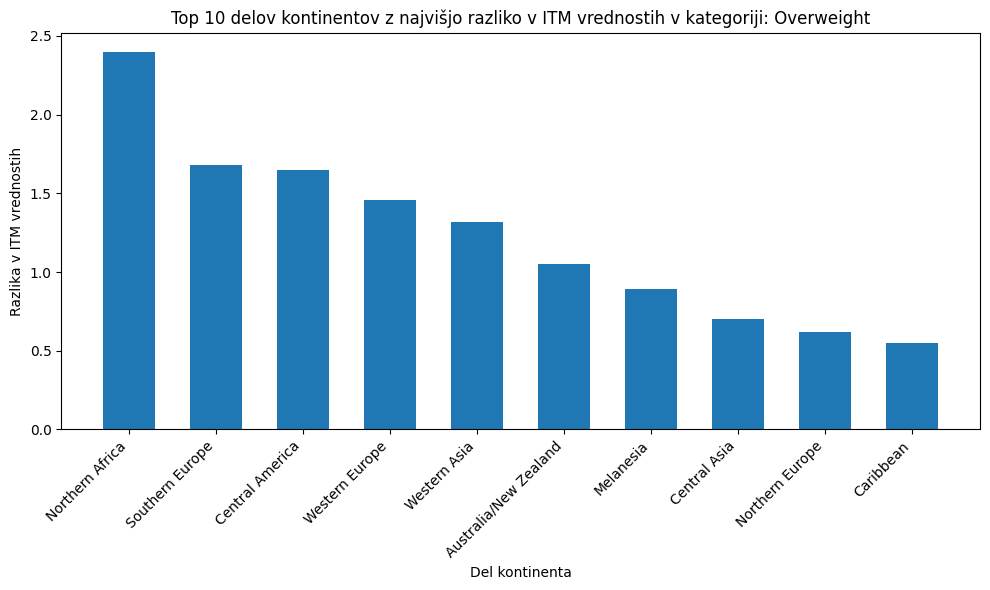

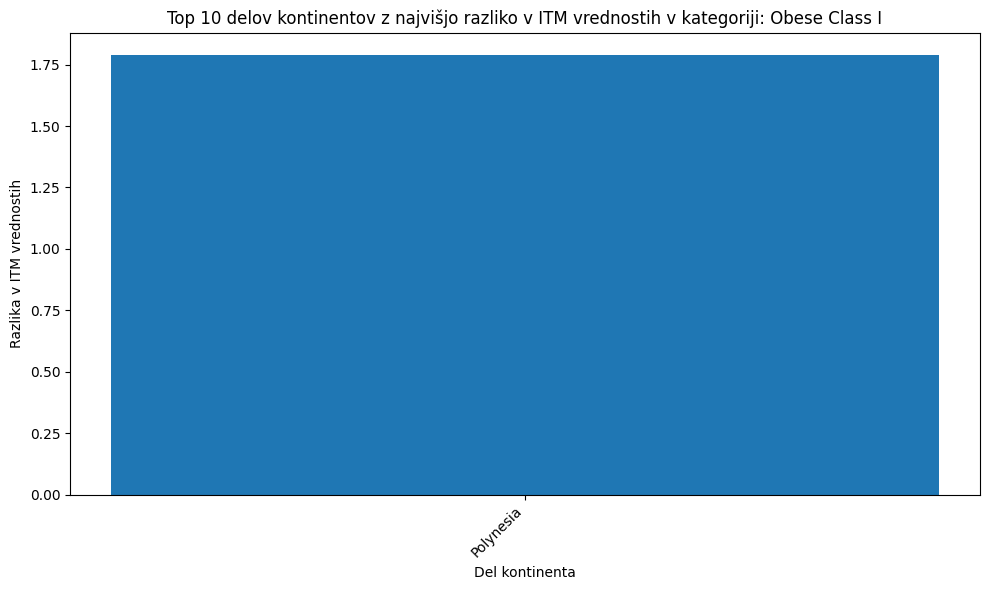

In [2002]:
for category_c, df_c in continent_difference_dfs.items():
    if not df_c.empty: #izločimo prazne grafe
        plt.figure(figsize=(10, 6))
        top_10_df_c = df_c.head(10)  # izberemo 10 držav z največjo razliko             
        plt.bar(top_10_df_c['del kontinenta'], top_10_df_c[f'ITM razlika v kategoriji: {category_c}'], width=0.6)        
        plt.xlabel('Del kontinenta')
        plt.ylabel('Razlika v ITM vrednostih')
        plt.title(f'Top 10 delov kontinentov z najvišjo razliko v ITM vrednostih v kategoriji: {category_c}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [2003]:
for category_c, df_c in continent_difference_dfs.items():
    continent, difference_c = find_largest_difference_continent(df_c)
    if continent and difference_c is not None:
        print(f'Največja razlika med ITM vrednostjo moških in žensk v kategoriji {category_c} je {difference_c:.2f}.')
        print(f'Ta razlika je prisotna na območju: {continent}.\n')

Največja razlika med ITM vrednostjo moških in žensk v kategoriji Normal je 1.31.
Ta razlika je prisotna na območju: Western Africa.

Največja razlika med ITM vrednostjo moških in žensk v kategoriji Overweight je 2.40.
Ta razlika je prisotna na območju: Northern Africa.

Največja razlika med ITM vrednostjo moških in žensk v kategoriji Obese Class I je 1.79.
Ta razlika je prisotna na območju: Polynesia.



Koliko so ITM vrednosti žensk večje od moških?

In [2004]:
for category_c, sorted_df_c in sorted_tables_by_category_male_c.items():
    average_itm_male_c = round(np.mean(sorted_df_c['ITM moških']), 2)
    average_itm_female_c = round(np.mean(sorted_tables_by_category_female_c[category_c]['ITM žensk']), 2)
    
    itm_difference_c = round(average_itm_female_c - average_itm_male_c, 2)
    
    print(f'Za kategorijo {category_c} je povprečna ITM vrednost moških: {average_itm_male_c}.')
    print(f'Povprečna ITM vrednost žensk: {average_itm_female_c}.')
    print(f'Razlika med ITM vrednostmi žensk in moških: {itm_difference_c}.\n')

Za kategorijo Normal je povprečna ITM vrednost moških: 22.81.
Povprečna ITM vrednost žensk: 23.22.
Razlika med ITM vrednostmi žensk in moških: 0.41.

Za kategorijo Overweight je povprečna ITM vrednost moških: 26.87.
Povprečna ITM vrednost žensk: 27.11.
Razlika med ITM vrednostmi žensk in moških: 0.24.

Za kategorijo Obese Class I je povprečna ITM vrednost moških: 30.28.
Povprečna ITM vrednost žensk: 31.64.
Razlika med ITM vrednostmi žensk in moških: 1.36.



In [2005]:
for category_c, sorted_df_c in sorted_tables_by_category_male_c.items():
    average_itm_male_c = round(np.mean(sorted_df_c['ITM moških']), 2)
    average_itm_female_c = round(np.mean(sorted_tables_by_category_female_c[category_c]['ITM žensk']), 2)
    
    itm_difference_c = round(average_itm_female_c - average_itm_male_c, 2)
    percentage_difference_c = round((itm_difference_c / average_itm_female_c) * 100, 2)
    
    print(f'Ženske ITM vrednosti so po državah v kategoriji {category_c} povprečno {round(percentage_difference_c, 2)} % višje od moških vrednosti.')

Ženske ITM vrednosti so po državah v kategoriji Normal povprečno 1.77 % višje od moških vrednosti.
Ženske ITM vrednosti so po državah v kategoriji Overweight povprečno 0.89 % višje od moških vrednosti.
Ženske ITM vrednosti so po državah v kategoriji Obese Class I povprečno 4.3 % višje od moških vrednosti.


Povprečno imajo ženske višjo vrednost. V katerih delih kontinentov je obratno glede na vsako kategorijo?

In [2006]:
def print_higher_itm_continents(dataframe_continents, dataframe_itm, male_itm_column, female_itm_column):
    # izberemo kontinente, kjer je ITM moških višji od ženskega
    continents_with_higher_male_ITM = dataframe_continents[dataframe_continents[male_itm_column] > dataframe_continents[female_itm_column]]
    
    num_continents = len(continents_with_higher_male_ITM)
    
    if num_continents > 0:
        continent_list = ', '.join(continents_with_higher_male_ITM['del kontinenta'])  
        print(f'Število delov kontinentov, kjer je ITM vrednost pri moških višja kot pri ženskah:', num_continents)
        print(f'Seznam delov kontinentov:', continent_list)
    else:
        print('Ni delov kontinentov, kjer je ITM vrednost pri moških višja kot pri ženskah.')

print_higher_itm_continents(urejena_tabela_continents, ITM, 'ITM moških', 'ITM žensk')

Število delov kontinentov, kjer je ITM vrednost pri moških višja kot pri ženskah: 5
Seznam delov kontinentov: East Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe


In [2007]:
def create_sorted_table_by_category(urejena_tabela_continents, itm, categories, gender_column):
    classified_continents = {category: {'continents': []} for category in categories}
    
    for _, row in urejena_tabela_continents.iterrows():
        continent = row['del kontinenta']
        itm_value = float(row[gender_column])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_continents[bounds['kategorija']]['continents'].append((continent, itm_value))
                break
    
    sorted_tables = {}
    for category, data in classified_continents.items():
        continents_list = data['continents']
        
        if continents_list:
            sorted_continents = sorted(continents_list, key=lambda x: x[1], reverse=True)  
            sorted_df = pd.DataFrame(sorted_continents, columns=['del kontinenta', gender_column], index=range(1, len(sorted_continents) + 1))
            sorted_tables[category] = sorted_df
    
    return sorted_tables

gender_column = 'ITM moških' 
sorted_tables_by_category = create_sorted_table_by_category(urejena_tabela_continents, ITM, ITM['kategorija'], gender_column)

for category, sorted_df in sorted_tables_by_category.items():
    continent_list = []
    for _, row in sorted_df.iterrows():
        continent = row['del kontinenta']
        itm_male = row[gender_column]
        itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])
        if itm_male > itm_female:
            continent_list.append(continent)
    
    num_continents = len(continent_list)
    
    if num_continents > 0:
        print(f'Število delov kontinentov v kategoriji {category}, kjer je ITM vrednost pri moških višja kot pri ženskah:', num_continents)
        print(f'Seznam delov kontinentov v kategoriji {category}:', continent_list)
        print('\n')

Število delov kontinentov v kategoriji Normal, kjer je ITM vrednost pri moških višja kot pri ženskah: 1
Seznam delov kontinentov v kategoriji Normal: ['East Asia']


Število delov kontinentov v kategoriji Overweight, kjer je ITM vrednost pri moških višja kot pri ženskah: 4
Seznam delov kontinentov v kategoriji Overweight: ['Australia/New Zealand', 'Northern Europe', 'Southern Europe', 'Western Europe']




C:\Users\amand\AppData\Local\Temp\ipykernel_24696\998012672.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])


Kolikšne so največje razlike med ITM vrednostmi glede na posamične kategorije, kjer so moške vrednosti višje od ženskih, in v katerih delih kontinentov so? 

C:\Users\amand\AppData\Local\Temp\ipykernel_24696\845736759.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])


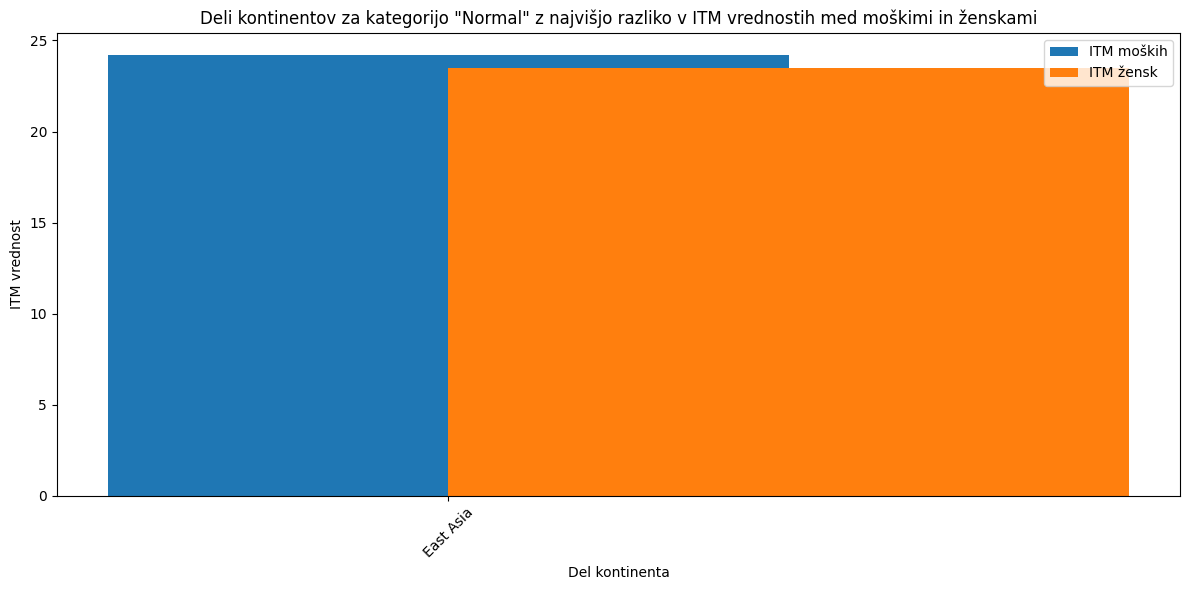

C:\Users\amand\AppData\Local\Temp\ipykernel_24696\845736759.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])


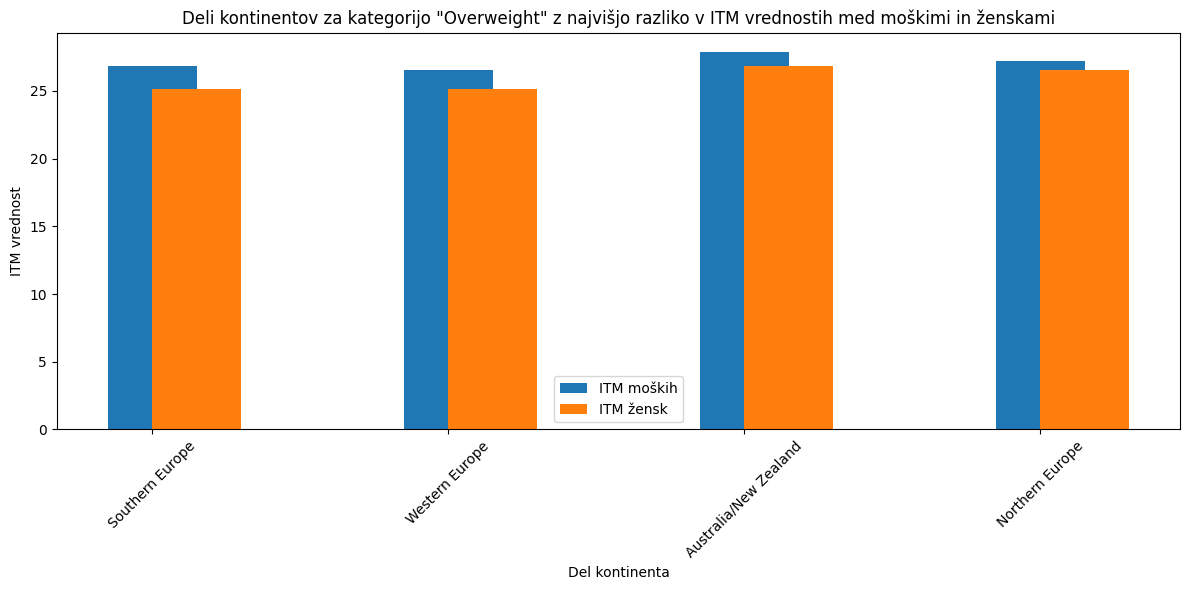

C:\Users\amand\AppData\Local\Temp\ipykernel_24696\845736759.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])


In [2008]:
urejena_tabela_continents['ITM razlika'] = urejena_tabela_continents['ITM moških'] - urejena_tabela_continents['ITM žensk']

for category, sorted_df in sorted_tables_by_category.items():
    continent_list = []
    for _, row in sorted_df.iterrows():
        continent = row['del kontinenta']
        itm_male = row[gender_column]
        itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])
        if itm_male > itm_female:
            continent_list.append(continent)
    
    num_continents = len(continent_list)
    
    if num_continents > 0:
        continents_with_higher_ITM_difference = urejena_tabela_continents[urejena_tabela_continents['del kontinenta'].isin(continent_list)].nlargest(10, 'ITM razlika')
        
        plt.figure(figsize=(12, 6))
        
        plt.bar(continents_with_higher_ITM_difference['del kontinenta'], continents_with_higher_ITM_difference['ITM moških'], width=0.3, label='ITM moških')
        plt.bar(continents_with_higher_ITM_difference['del kontinenta'], continents_with_higher_ITM_difference['ITM žensk'], width=0.3, align='edge', label='ITM žensk')
        
        plt.xlabel('Del kontinenta')
        plt.ylabel('ITM vrednost')
        plt.title(f'Deli kontinentov za kategorijo "{category}" z najvišjo razliko v ITM vrednostih med moškimi in ženskami')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

Category: Normal
  del kontinenta  ITM razlika v kategoriji: Normal
0      East Asia                              0.74




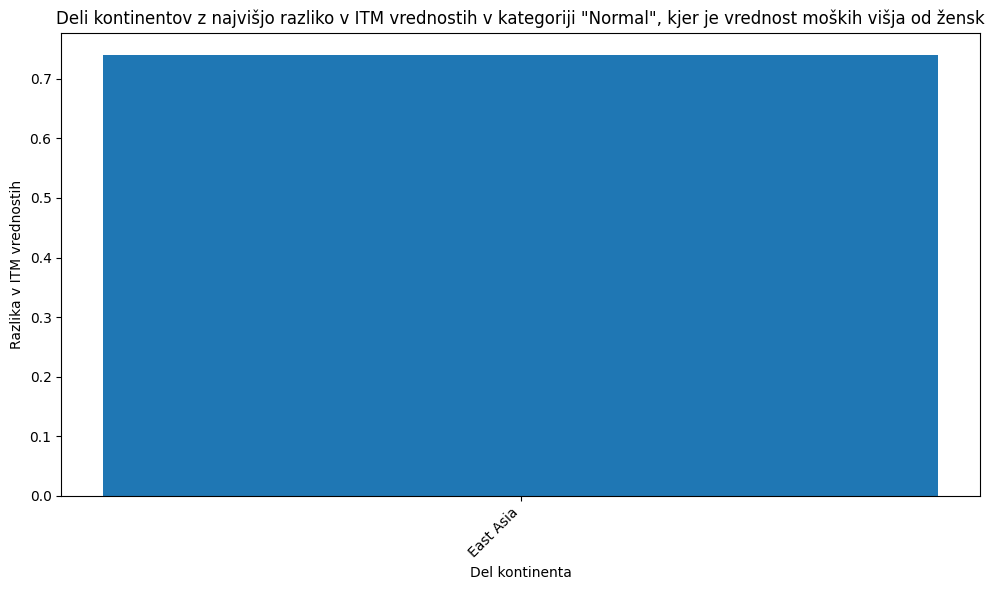

Category: Overweight
          del kontinenta  ITM razlika v kategoriji: Overweight
0        Southern Europe                                  1.68
1         Western Europe                                  1.46
2  Australia/New Zealand                                  1.05
3        Northern Europe                                  0.62




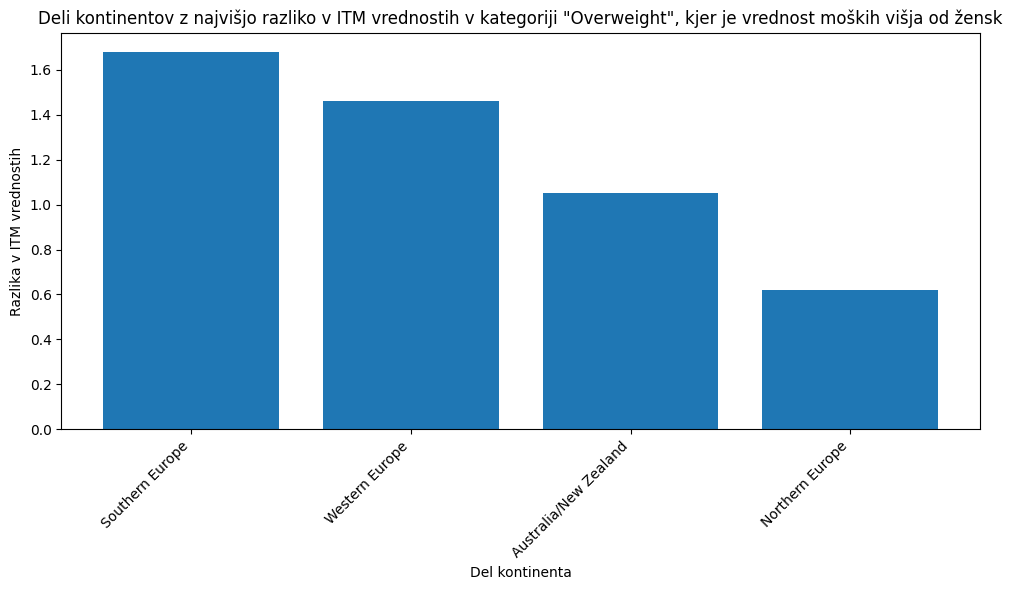

In [2009]:
continent_differences_by_category_c = {category_c: [] for category_c in sorted_tables_by_category_male_c.keys()}

for category_c in sorted_tables_by_category_male_c.keys():
    sorted_df_male_c = sorted_tables_by_category_male_c[category_c]
    sorted_df_female_c = sorted_tables_by_category_female_c[category_c]
    
    for _, row_male_c in sorted_df_male_c.iterrows():
        continent = row_male_c['del kontinenta']  
        itm_male_c = float(row_male_c['ITM moških'])  

        row_female_c = sorted_df_female_c[sorted_df_female_c['del kontinenta'] == continent]
        
        if not row_female_c.empty:
            itm_female_c = float(row_female_c.iloc[0]['ITM žensk'])  
            if itm_male_c > itm_female_c: 
                difference_c = itm_male_c - itm_female_c
                continent_differences_by_category_c[category_c].append((continent, difference_c))


continent_difference_dfs = {}
for category_c, differences_c in continent_differences_by_category_c.items():
    sorted_differences_c = sorted(differences_c, key=lambda x: x[1], reverse=True)
    df_c = pd.DataFrame(sorted_differences_c, columns=['del kontinenta', f'ITM razlika v kategoriji: {category_c}'])
    continent_difference_dfs[category_c] = df_c


for category_c, df_c in continent_difference_dfs.items():
    if not df_c.empty: 
        print(f'Category: {category_c}')
        print(df_c)
        print('\n')
        
        plt.figure(figsize=(10, 6))
        plt.bar(df_c['del kontinenta'], df_c[f'ITM razlika v kategoriji: {category_c}'])
        plt.xlabel('Del kontinenta')
        plt.ylabel('Razlika v ITM vrednostih')
        plt.title(f'Deli kontinentov z najvišjo razliko v ITM vrednostih v kategoriji "{category_c}", kjer je vrednost moških višja od žensk')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Kje je največja razlika med moškimi in ženskami in kolikšna je?

In [2010]:
urejena_tabela_continents['ITM razlika'] = urejena_tabela_continents['ITM moških'] - urejena_tabela_continents['ITM žensk']

for category, sorted_df in sorted_tables_by_category.items():
    continent_list = []
    for _, row in sorted_df.iterrows():
        continent = row['del kontinenta']
        itm_male = row[gender_column]
        itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])
        if itm_male > itm_female:
            continent_list.append(continent)
    
    num_continents = len(continent_list)
    
    if num_continents > 0:
        continents_with_higher_ITM_difference = urejena_tabela_continents[
            urejena_tabela_continents['del kontinenta'].isin(continent_list)
        ].nlargest(10, 'ITM razlika')
        
        max_ITM_difference = round(np.max(continents_with_higher_ITM_difference['ITM razlika']), 2)
        max_ITM_row = continents_with_higher_ITM_difference.loc[(continents_with_higher_ITM_difference['ITM razlika']).idxmax()]
        continent_with_max_ITM_difference = max_ITM_row['del kontinenta']
        
        print(f'Category: {category}')
        print(f'Največja razlika med ITM moških in žensk je {max_ITM_difference}.')
        print(f'Ta razlika je prisotna na kontinentu: {continent_with_max_ITM_difference}')
        print('\n')

Category: Normal
Največja razlika med ITM moških in žensk je 0.74.
Ta razlika je prisotna na kontinentu: East Asia


Category: Overweight
Največja razlika med ITM moških in žensk je 1.68.
Ta razlika je prisotna na kontinentu: Southern Europe




C:\Users\amand\AppData\Local\Temp\ipykernel_24696\1999628973.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])
C:\Users\amand\AppData\Local\Temp\ipykernel_24696\1999628973.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])
C:\Users\amand\AppData\Local\Temp\ipykernel_24696\1999628973.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  itm_female = float(urejena_tabela_continents[urejena_tabela_continents['del kontinenta'] == continent]['ITM žensk'])


## 3. Razporeditve po kategorijah glede na ITM prime klasifikacijo

ITM prime je zelo tesno povezan z ITM vrednostjo in je zelo uporaben (na prvo žogo morda še bolj, saj lahko npr. za osebo, katere ITM prime je 1.36, avtomatično vemo, da je 36 % nad svojo zgornjo mejo telesne teže). Pri tem razdelku je prikazanih le nekaj osnovnih tabel, saj se podatki tesno ujemajo z analizami o ITM vrednosti in ni imelo smisla delati (dokaj) enake statistike še enkrat.

Sicer lahko opazimo manjša odstopanja, kar nastopi zaradi dopustnega izračunavanja vrednosti na različne načine. V splošnem velja, da je izračun sledeč: ITM / 25. A v nekaterih delih sveta, kot npr. v Aziji, se priporoča vzeti vrednost 23 namesto 25. Tako pride do razlik.

### 3.1. Države

In [2011]:
# po formuli izračunamo ITM prime
countries['ITM prime moških'] = countries['ITM moških'] / 25
countries['ITM prime žensk'] = countries['ITM žensk'] / 25

print(countries)

                 ime države  višina moških  teža moških  ITM moških  \
0               Netherlands           1.84         87.9        26.1   
1                Montenegro           1.83         90.4        27.0   
2                   Estonia           1.82         89.9        27.0   
3                   Denmark           1.82         86.8        26.3   
4    Bosnia and Herzegovina           1.82         87.1        26.4   
..                      ...            ...          ...         ...   
122                   Nepal           1.64         60.5        22.5   
123               Guatemala           1.64         69.1        25.7   
124                   Yemen           1.63         62.5        23.6   
125                    Laos           1.62         59.5        22.6   
126              East Timor           1.59         53.9        21.2   

     višina žensk  teža žensk  ITM žensk  ITM prime moških  ITM prime žensk  
0            1.70        73.2       25.3             1.044           

In [2012]:
# dodatek, da so stolpci tabele v istem vrstnem redu kot pri ostalih tabelah
desired_columns = ['ime države', 'višina moških', 'teža moških', 'ITM moških', 'ITM prime moških', 'višina žensk', 'teža žensk', 'ITM žensk', 'ITM prime žensk']
urejena_tabela_countries = countries[desired_columns].round(2)

print(urejena_tabela_countries)

                 ime države  višina moških  teža moških  ITM moških  \
0               Netherlands           1.84         87.9        26.1   
1                Montenegro           1.83         90.4        27.0   
2                   Estonia           1.82         89.9        27.0   
3                   Denmark           1.82         86.8        26.3   
4    Bosnia and Herzegovina           1.82         87.1        26.4   
..                      ...            ...          ...         ...   
122                   Nepal           1.64         60.5        22.5   
123               Guatemala           1.64         69.1        25.7   
124                   Yemen           1.63         62.5        23.6   
125                    Laos           1.62         59.5        22.6   
126              East Timor           1.59         53.9        21.2   

     ITM prime moških  višina žensk  teža žensk  ITM žensk  ITM prime žensk  
0                1.04          1.70        73.2       25.3           

#### 3.1.1. Moški

In [2013]:
def classify_and_print_countries_prime(urejena_tabela_countries, categories_prime):
    classified_countries_prime = {category_prime: {'countries': [], 'count': 0} for category_prime in categories_prime['kategorija']}
    category_counts_prime = {}  
    
    for _, row in urejena_tabela_countries.iterrows():
        country_prime = row['ime države']
        itm_prime_male = float(row['ITM prime moških'])
        itm_prime_female = float(row['ITM prime žensk'])
        
        for _, bounds in categories_prime.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM prime'])
            
            if lower_bound <= itm_prime_male < upper_bound or lower_bound <= itm_prime_female < upper_bound:
                classified_countries_prime[bounds['kategorija']]['countries'].append(country_prime)
                classified_countries_prime[bounds['kategorija']]['count'] += 1
                break
    
    for category_prime, data_prime in classified_countries_prime.items():
        count_prime = data_prime['count']
        countries_list_prime = data_prime['countries']
        
        if count_prime == 0:
            print(f'V kategoriji {category_prime} ni nobene države.')
        else:
            country_list_str_prime = ', '.join(countries_list_prime)
            total_countries_prime = len(countries_list_prime)
            print(f'V kategoriji {category_prime} so naslednje države: {country_list_str_prime}. Število vseh držav je {total_countries_prime}.')
        category_counts_prime[category_prime] = count_prime
    
    return category_counts_prime

category_counts_prime = classify_and_print_countries_prime(urejena_tabela_countries, ITM)

V kategoriji Severe Thinness ni nobene države.
V kategoriji Moderate Thinness ni nobene države.
V kategoriji Mild Thinness ni nobene države.
V kategoriji Normal so naslednje države: Denmark, Switzerland, Austria, France, South Korea, China, Hong Kong, North Korea, Algeria, Taiwan, Singapore, Mauritius, Haiti, Japan, Thailand, Cameroon, Sudan, Chad, Somalia, Eritrea, Zimbabwe, Kenya, Nigeria, Ghana, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Maldives, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 44.
V kategoriji Overweight so naslednje države: Netherlands, Montenegro, Estonia, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Australia, Ireland, Canada, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Poly

In [2014]:
def create_sorted_tables_by_category_prime(countries, itm, categories_prime):
    classified_countries_prime = {category_prime: {'countries': []} for category_prime in categories_prime}
    
    for _, country_row in countries.iterrows():
        country = country_row['ime države']
        itm_value = float(country_row['ITM moških'])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries_prime[bounds['kategorija']]['countries'].append((country, itm_value))
                break
    
    sorted_tables_prime = {}
    for category_prime, data_prime in classified_countries_prime.items():
        countries_list_prime = data_prime['countries']
        
        if countries_list_prime:
            sorted_countries_prime = sorted(countries_list_prime, key=lambda x: x[1], reverse=True)
            sorted_df_prime = pd.DataFrame(sorted_countries_prime, columns=['ime države', 'ITM moških'])
            sorted_tables_prime[category_prime] = sorted_df_prime
    
    return sorted_tables_prime

sorted_tables_by_category_prime = create_sorted_tables_by_category_prime(countries, ITM, ITM['kategorija'])
for category_prime, sorted_df_prime in sorted_tables_by_category_prime.items():
    print(f'Category: {category_prime}')
    print(sorted_df_prime)
    print('\n')

Category: Normal
               ime države  ITM moških
0                 Algeria        24.7
1               Mauritius        24.6
2                Maldives        24.6
3               Hong Kong        24.5
4             South Korea        24.4
..                    ...         ...
33  Congo (Dem. Republic)        21.4
34             Bangladesh        21.3
35             East Timor        21.2
36                Eritrea        20.3
37               Ethiopia        20.1

[38 rows x 2 columns]


Category: Overweight
          ime države  ITM moških
0   French Polynesia        29.6
1              Palau        29.6
2        Saint Lucia        29.5
3           Kiribati        29.1
4      United States        29.0
..               ...         ...
76          Malaysia        25.2
77           Grenada        25.1
78      South Africa        25.1
79          Dominica        25.0
80            Taiwan        25.0

[81 rows x 2 columns]


Category: Obese Class I
       ime države  ITM moških
0  Ame

#### 3.1.2. Ženske

In [2015]:
def classify_and_print_countries_female(countries, categories):
    classified_countries = {category: {'countries': [], 'count': 0} for category in categories['kategorija']}
    category_counts = {}

    for _, row in countries.iterrows():
        country = row['ime države']
        itm = float(row['ITM žensk'])

        for _, bounds in categories.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])

            if lower_bound <= itm < upper_bound:
                classified_countries[bounds['kategorija']]['countries'].append(country)
                classified_countries[bounds['kategorija']]['count'] += 1
                break

    for category, data in classified_countries.items():
        count = data['count']
        countries_list = data['countries']

        if count == 0:
            print(f'V kategoriji {category} ni nobene države.')
        else:
            country_list_str = ', '.join(countries_list)
            total_countries = len(countries_list)
            print(f'V kategoriji {category} so naslednje države: {country_list_str}. Število vseh držav je {total_countries}.')
        category_counts[category] = count

    return category_counts

category_counts_f = classify_and_print_countries_female(countries, ITM)

V kategoriji Severe Thinness ni nobene države.
V kategoriji Moderate Thinness ni nobene države.
V kategoriji Mild Thinness ni nobene države.
V kategoriji Normal so naslednje države: Denmark, Switzerland, Austria, France, South Korea, China, Hong Kong, Italy, North Korea, Taiwan, Singapore, Haiti, Japan, Chad, Somalia, Eritrea, Kenya, Nigeria, Niger, Vietnam, Afghanistan, Congo (Dem. Republic), Ethiopia, Sri Lanka, Burundi, Pakistan, Myanmar, India, Indonesia, Cambodia, Madagascar, Philippines, Bangladesh, Nepal, Yemen, Laos, East Timor. Število vseh držav je 37.
V kategoriji Overweight so naslednje države: Netherlands, Montenegro, Estonia, Bosnia and Herzegovina, Iceland, Czechia, Slovenia, Slovakia, Croatia, Serbia, Sweden, Norway, Lithuania, Poland, Ukraine, Finland, Latvia, Germany, Dominica, Belgium, Bermuda, Greece, Puerto Rico, Australia, Ireland, Canada, Antigua and Barbuda, Lebanon, Belarus, Andorra, French Polynesia, Luxembourg, United Kingdom, Grenada, New Zealand, Romania, U

In [2016]:
def create_sorted_tables_by_category_female(countries, itm, categories):
    classified_countries_female = {category: {'countries': []} for category in categories}
    
    for _, row in countries.iterrows():
        country = row['ime države']
        itm_value = float(row['ITM žensk'])
        
        for _, bounds in itm.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM'])
            
            if lower_bound <= itm_value < upper_bound:
                classified_countries_female[bounds['kategorija']]['countries'].append((country, itm_value))
                break
    
    sorted_tables_female = {}
    for category, data in classified_countries_female.items():
        countries_list_female = data['countries']
        
        if countries_list_female:
            sorted_countries_female = sorted(countries_list_female, key=lambda x: x[1], reverse=True)
            sorted_df_female = pd.DataFrame(sorted_countries_female, columns=['ime države', 'ITM žensk'])
            sorted_tables_female[category] = sorted_df_female
    
    return sorted_tables_female

sorted_tables_by_category_female = create_sorted_tables_by_category_female(countries, ITM, ITM['kategorija'])
for category, sorted_df in sorted_tables_by_category_female.items():
    print(f'Category: {category}')
    print(sorted_df)
    print('\n')

Category: Normal
    ime države  ITM žensk
0        Italy       24.9
1      Austria       24.7
2     Pakistan       24.7
3      Denmark       24.6
4       France       24.4
..         ...        ...
32     Burundi       21.5
33  East Timor       21.2
34     Eritrea       21.1
35  Madagascar       21.1
36    Ethiopia       21.0

[37 rows x 2 columns]


Category: Overweight
                ime države  ITM žensk
0                     Iraq       29.7
1                    Palau       29.7
2         French Polynesia       29.5
3     United Arab Emirates       29.5
4             South Africa       29.5
..                     ...        ...
72  Bosnia and Herzegovina       25.3
73                   Ghana       25.2
74                   Spain       25.1
75                Cameroon       25.1
76                Thailand       25.0

[77 rows x 2 columns]


Category: Obese Class I
      ime države  ITM žensk
0          Samoa       34.1
1          Tonga       33.9
2        Tokelau       33.7
3       

### 3.2. Kontinenti

In [2017]:
# po formuli izračunamo ITM prime
urejena_tabela_continents['ITM prime moških'] = urejena_tabela_continents['ITM moških'] / 25
urejena_tabela_continents['ITM prime žensk'] = urejena_tabela_continents['ITM žensk'] / 25

print(urejena_tabela_continents)

     del kontinenta  višina moških  teža moških  ITM moških  višina žensk  \
0   Northern Africa           1.73         77.9       26.03          1.61   
1    Eastern Africa           1.67         60.1       21.55          1.57   
2    Western Africa           1.70         64.9       22.46          1.59   
3   Southern Africa           1.69         71.2       24.93          1.59   
4    Central Africa           1.69         62.6       21.92          1.58   
..              ...            ...          ...         ...           ...   
17  Northern Europe           1.79         87.1       27.18          1.65   
18   Eastern Europe           1.78         83.8       26.45          1.65   
19        Polynesia           1.76         93.8       30.28          1.65   
20        Melanesia           1.64         68.1       25.32          1.57   
21       Micronesia           1.69         82.7       28.96          1.59   

    teža žensk  ITM žensk  ITM razlika  ITM prime moških  ITM prime žensk  

In [2018]:
# dodatek, da so stolpci tabele v istem vrstnem redu kot pri ostalih tabelah
desired_columns = ['del kontinenta', 'višina moških', 'teža moških', 'ITM moških', 'ITM prime moških', 'višina žensk', 'teža žensk', 'ITM žensk', 'ITM prime žensk']
urejena_tabela_continents_prime = urejena_tabela_continents[desired_columns].round(2)

print(urejena_tabela_continents_prime)

     del kontinenta  višina moških  teža moških  ITM moških  ITM prime moških  \
0   Northern Africa           1.73         77.9       26.03              1.04   
1    Eastern Africa           1.67         60.1       21.55              0.86   
2    Western Africa           1.70         64.9       22.46              0.90   
3   Southern Africa           1.69         71.2       24.93              1.00   
4    Central Africa           1.69         62.6       21.92              0.88   
..              ...            ...          ...         ...               ...   
17  Northern Europe           1.79         87.1       27.18              1.09   
18   Eastern Europe           1.78         83.8       26.45              1.06   
19        Polynesia           1.76         93.8       30.28              1.21   
20        Melanesia           1.64         68.1       25.32              1.01   
21       Micronesia           1.69         82.7       28.96              1.16   

    višina žensk  teža žens

#### 3.2.1. Moški

In [2019]:
def classify_and_print_continents_prime(urejena_tabela_continents_prime, categories_prime):
    classified_continents_prime = {category_prime: {'continents': [], 'count': 0} for category_prime in categories_prime['kategorija']}
    category_counts_prime = {}  
    
    for _, row in urejena_tabela_continents_prime.iterrows():
        continent_prime = row['del kontinenta']
        itm_prime = float(row['ITM prime moških'])  
        
        for _, bounds in categories_prime.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM prime'])
            
            if lower_bound <= itm_prime < upper_bound:
                classified_continents_prime[bounds['kategorija']]['continents'].append(continent_prime)
                classified_continents_prime[bounds['kategorija']]['count'] += 1
                break
    
    for category_prime, data_prime in classified_continents_prime.items():
        count_prime = data_prime['count']
        continents_list_prime = data_prime['continents']
        
        if count_prime == 0:
            print(f"V kategoriji '{category_prime}' ni nobenega dela kontinenta.")
        else:
            continent_list_str_prime = ', '.join(continents_list_prime)
            total_continents_prime = len(continents_list_prime)
            print(f"V kategoriji '{category_prime}' so naslednji deli kontinentov: {continent_list_str_prime}. Število vseh delov kontinentov je {total_continents_prime}.")
        category_counts_prime[category_prime] = count_prime
    
    return category_counts_prime

category_counts_continents_prime = classify_and_print_continents_prime(urejena_tabela_continents_prime, ITM)


V kategoriji 'Severe Thinness' ni nobenega dela kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega dela kontinenta.
V kategoriji 'Mild Thinness' ni nobenega dela kontinenta.
V kategoriji 'Normal' so naslednji deli kontinentov: Eastern Africa, Western Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh delov kontinentov je 6.
V kategoriji 'Overweight' so naslednji deli kontinentov: Northern Africa, Southern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia, Micronesia. Število vseh delov kontinentov je 15.
V kategoriji 'Obese Class I' so naslednji deli kontinentov: Polynesia. Število vseh delov kontinentov je 1.
V kategoriji 'Obese Class II' ni nobenega dela kontinenta.
V kategoriji 'Obese Class III' ni nobenega dela kontinenta.


In [2020]:
def create_sorted_tables_by_category_male_c_prime(urejena_tabela_continents_prime, itm_prime, categories_prime):
    classified_continents_prime = {category_prime: {'continents': []} for category_prime in categories_prime}
    
    for _, row in urejena_tabela_continents_prime.iterrows():
        continent_prime = row['del kontinenta']
        itm_value_prime = float(row['ITM prime moških'])  
        
        for _, bounds in itm_prime.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM prime'])
            
            if lower_bound <= itm_value_prime < upper_bound:
                classified_continents_prime[bounds['kategorija']]['continents'].append((continent_prime, itm_value_prime))
                break
    
    sorted_tables_prime = {}
    for category_prime, data_prime in classified_continents_prime.items():
        continents_list_prime = data_prime['continents']
        
        if continents_list_prime:
            sorted_continents_prime = sorted(continents_list_prime, key=lambda x: x[1], reverse=True)  
            sorted_df_c_prime = pd.DataFrame(sorted_continents_prime, columns=['del kontinenta', 'ITM prime moških'], index=range(1, len(sorted_continents_prime) + 1))
            sorted_tables_prime[category_prime] = sorted_df_c_prime
    
    return sorted_tables_prime

sorted_tables_by_category_male_c_prime = create_sorted_tables_by_category_male_c_prime(urejena_tabela_continents_prime, ITM, ITM['kategorija'])
for category_prime, sorted_df_c_prime in sorted_tables_by_category_male_c_prime.items():
    print(f'Category: {category_prime}')
    print(sorted_df_c_prime)
    print('\n')

Category: Normal
   del kontinenta  ITM prime moških
1       East Asia              0.97
2  Western Africa              0.90
3  Southeast Asia              0.90
4  Central Africa              0.88
5      South Asia              0.88
6  Eastern Africa              0.86


Category: Overweight
           del kontinenta  ITM prime moških
1              Micronesia              1.16
2           North America              1.14
3   Australia/New Zealand              1.12
4            Western Asia              1.09
5         Northern Europe              1.09
6         Southern Europe              1.07
7           South America              1.06
8          Western Europe              1.06
9          Eastern Europe              1.06
10        Central America              1.05
11           Central Asia              1.05
12        Northern Africa              1.04
13              Caribbean              1.04
14              Melanesia              1.01
15        Southern Africa              1.00


Ca

#### 3.2.2. Ženske

In [2021]:
def classify_and_print_continents_prime_female(urejena_tabela_continents_prime, categories_prime_female):
    classified_continents_prime_female = {category_prime: {'continents': [], 'count': 0} for category_prime in categories_prime_female['kategorija']}
    category_counts_prime_female = {}
    
    for _, row in urejena_tabela_continents_prime.iterrows():
        continent_prime = row['del kontinenta']
        itm_prime_female = float(row['ITM prime žensk']) 
        
        for _, bounds in categories_prime_female.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM prime'])
            
            if lower_bound <= itm_prime_female < upper_bound:
                classified_continents_prime_female[bounds['kategorija']]['continents'].append(continent_prime)
                classified_continents_prime_female[bounds['kategorija']]['count'] += 1
                break
    
    for category_prime, data_prime in classified_continents_prime_female.items():
        count_prime = data_prime['count']
        continents_list_prime = data_prime['continents']
        
        if count_prime == 0:
            print(f"V kategoriji '{category_prime}' ni nobenega dela kontinenta.")
        else:
            continent_list_str_prime = ', '.join(continents_list_prime)
            total_continents_prime = len(continents_list_prime)
            print(f"V kategoriji '{category_prime}' so naslednji deli kontinentov: {continent_list_str_prime}. Število vseh delov kontinentov je {total_continents_prime}.")
        category_counts_prime_female[category_prime] = count_prime
    
    return category_counts_prime_female

category_counts_continents_prime_female = classify_and_print_continents_prime_female(urejena_tabela_continents_prime, ITM)

V kategoriji 'Severe Thinness' ni nobenega dela kontinenta.
V kategoriji 'Moderate Thinness' ni nobenega dela kontinenta.
V kategoriji 'Mild Thinness' ni nobenega dela kontinenta.
V kategoriji 'Normal' so naslednji deli kontinentov: Eastern Africa, Western Africa, Central Africa, East Asia, South Asia, Southeast Asia. Število vseh delov kontinentov je 6.
V kategoriji 'Overweight' so naslednji deli kontinentov: Northern Africa, Southern Africa, Caribbean, North America, South America, Central America, Western Asia, Central Asia, Australia/New Zealand, Western Europe, Southern Europe, Northern Europe, Eastern Europe, Melanesia. Število vseh delov kontinentov je 14.
V kategoriji 'Obese Class I' so naslednji deli kontinentov: Polynesia, Micronesia. Število vseh delov kontinentov je 2.
V kategoriji 'Obese Class II' ni nobenega dela kontinenta.
V kategoriji 'Obese Class III' ni nobenega dela kontinenta.


In [2022]:
def create_sorted_tables_by_category_female_c_prime(urejena_tabela_continents_prime, itm_prime, categories_prime):
    classified_continents_prime = {category_prime: {'continents': []} for category_prime in categories_prime}
    
    for _, row in urejena_tabela_continents_prime.iterrows():
        continent_prime = row['del kontinenta']
        itm_value_prime = float(row['ITM prime žensk'])  
        
        for _, bounds in itm_prime.iterrows():
            lower_bound, upper_bound = parse_to_bounds(bounds['ITM prime'])
            
            if lower_bound <= itm_value_prime < upper_bound:
                classified_continents_prime[bounds['kategorija']]['continents'].append((continent_prime, itm_value_prime))
                break
    
    sorted_tables_prime = {}
    for category_prime, data_prime in classified_continents_prime.items():
        continents_list_prime = data_prime['continents']
        
        if continents_list_prime:
            sorted_continents_prime = sorted(continents_list_prime, key=lambda x: x[1], reverse=True)  
            sorted_df_c_prime = pd.DataFrame(sorted_continents_prime, columns=['del kontinenta', 'ITM prime žensk'], index=range(1, len(sorted_continents_prime) + 1))
            sorted_tables_prime[category_prime] = sorted_df_c_prime
    
    return sorted_tables_prime

sorted_tables_by_category_female_c_prime = create_sorted_tables_by_category_female_c_prime(urejena_tabela_continents_prime, ITM, ITM['kategorija'])
for category_prime, sorted_df_c_prime in sorted_tables_by_category_female_c_prime.items():
    print(f'Category: {category_prime}')
    print(sorted_df_c_prime)
    print('\n')


Category: Normal
   del kontinenta  ITM prime žensk
1  Western Africa             0.95
2       East Asia             0.94
3  Southeast Asia             0.94
4  Central Africa             0.93
5  Eastern Africa             0.91
6      South Asia             0.90


Category: Overweight
           del kontinenta  ITM prime žensk
1         Southern Africa             1.16
2         Northern Africa             1.14
3           North America             1.14
4            Western Asia             1.14
5         Central America             1.11
6           South America             1.08
7            Central Asia             1.08
8   Australia/New Zealand             1.07
9               Caribbean             1.06
10        Northern Europe             1.06
11         Eastern Europe             1.06
12              Melanesia             1.05
13        Southern Europe             1.01
14         Western Europe             1.00


Category: Obese Class I
  del kontinenta  ITM prime žensk
1      Pol